In [1]:
import torch
import models_jw
from utils import *
from tqdm import tqdm
import numpy as np
from configs import paramsuper, getters
from helpers import * 

args = paramsuper.ICIFARHashResNet18()

torch.manual_seed(args.seed)
np.random.seed(0)

use_cuda = not args.no_cuda and torch.cuda.is_available()
device = torch.device("cuda:2" if use_cuda else "cpu")
smallheads = False
kwargs = {'num_workers': 1, 'pin_memory': True, 'smallheads': smallheads} if use_cuda else {}


In [2]:
import pickle
l = []
for i in range(7):
    with open(f'ebms/1_{i}_0_0', 'rb') as fp:
        l.append(pickle.load(fp))

l2 = []
for i in range(7):
    with open(f'ebms/1_{i}_1_0', 'rb') as fp:
        l2.append(pickle.load(fp))

l3 = []
for i in range(4):
    with open(f'ebms/1_{i}_0_0_bh', 'rb') as fp:
        l3.append(pickle.load(fp))


with open(f'ebms/ce_1_0', 'rb') as fp:
    ce = pickle.load(fp)

with open(f'ebms/ce_0_0', 'rb') as fp:
    ce0 = pickle.load(fp)



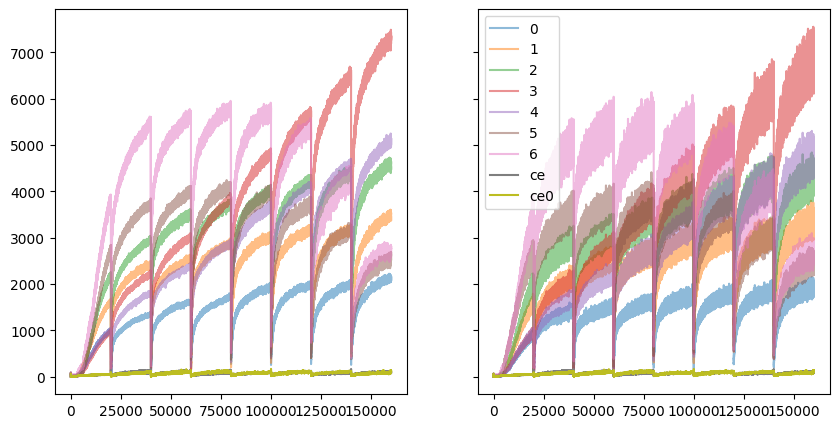

In [3]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1,2,figsize=(10,5), sharey=True)
for i in range(7):
    axs[0].plot(l[i], label=i, alpha=0.5)
    axs[1].plot(l2[i], label=i, alpha=0.5)

axs[0].plot(ce, label="ce")
axs[1].plot(ce, label="ce")

axs[0].plot(ce0, label="ce0")
axs[1].plot(ce0, label="ce0")
        
plt.legend()

In [16]:
i=7
with open(f'exp_ebms/h400_0_0_bh_{i}_ah_loss2', 'rb') as fp:
    l = pickle.load(fp)

with open(f'exp_ebms/h400_0_0_bh_{i}_ah_loss1', 'rb') as fp:
    l2 = pickle.load(fp)


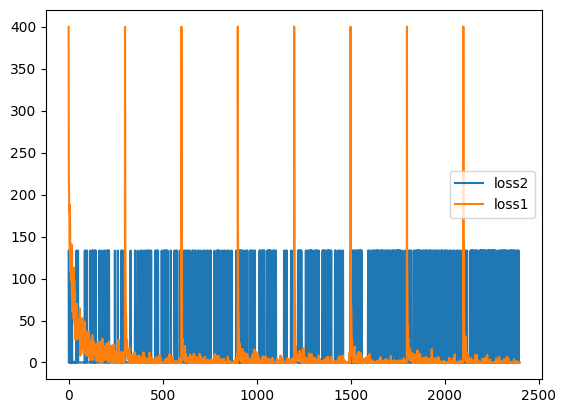

In [20]:
plt.plot(l[0::100], label="loss2")
plt.plot(l2[0::100], label="loss1")
plt.legend()

In [21]:
for i in range(4):
    print(check_accs(f"h10_0_0_bh_{i}_ah", smallheads=False, device="cuda:3"))

100%|██████████| 10/10 [00:01<00:00,  5.38it/s]


{0: 35, 1: 0, 2: 0, 3: 0, 4: 21, 5: 5, 6: 0, 7: 0, 8: 2, 9: 90}


100%|██████████| 10/10 [00:01<00:00,  5.29it/s]


{0: 797, 1: 0, 2: 0, 3: 0, 4: 7, 5: 1, 6: 25, 7: 0, 8: 52, 9: 84}


100%|██████████| 10/10 [00:01<00:00,  5.32it/s]


{0: 760, 1: 679, 2: 0, 3: 0, 4: 21, 5: 0, 6: 35, 7: 0, 8: 2, 9: 90}


100%|██████████| 10/10 [00:01<00:00,  5.41it/s]

{0: 723, 1: 648, 2: 741, 3: 0, 4: 27, 5: 0, 6: 52, 7: 0, 8: 12, 9: 91}


4it [01:07, 16.99s/it]


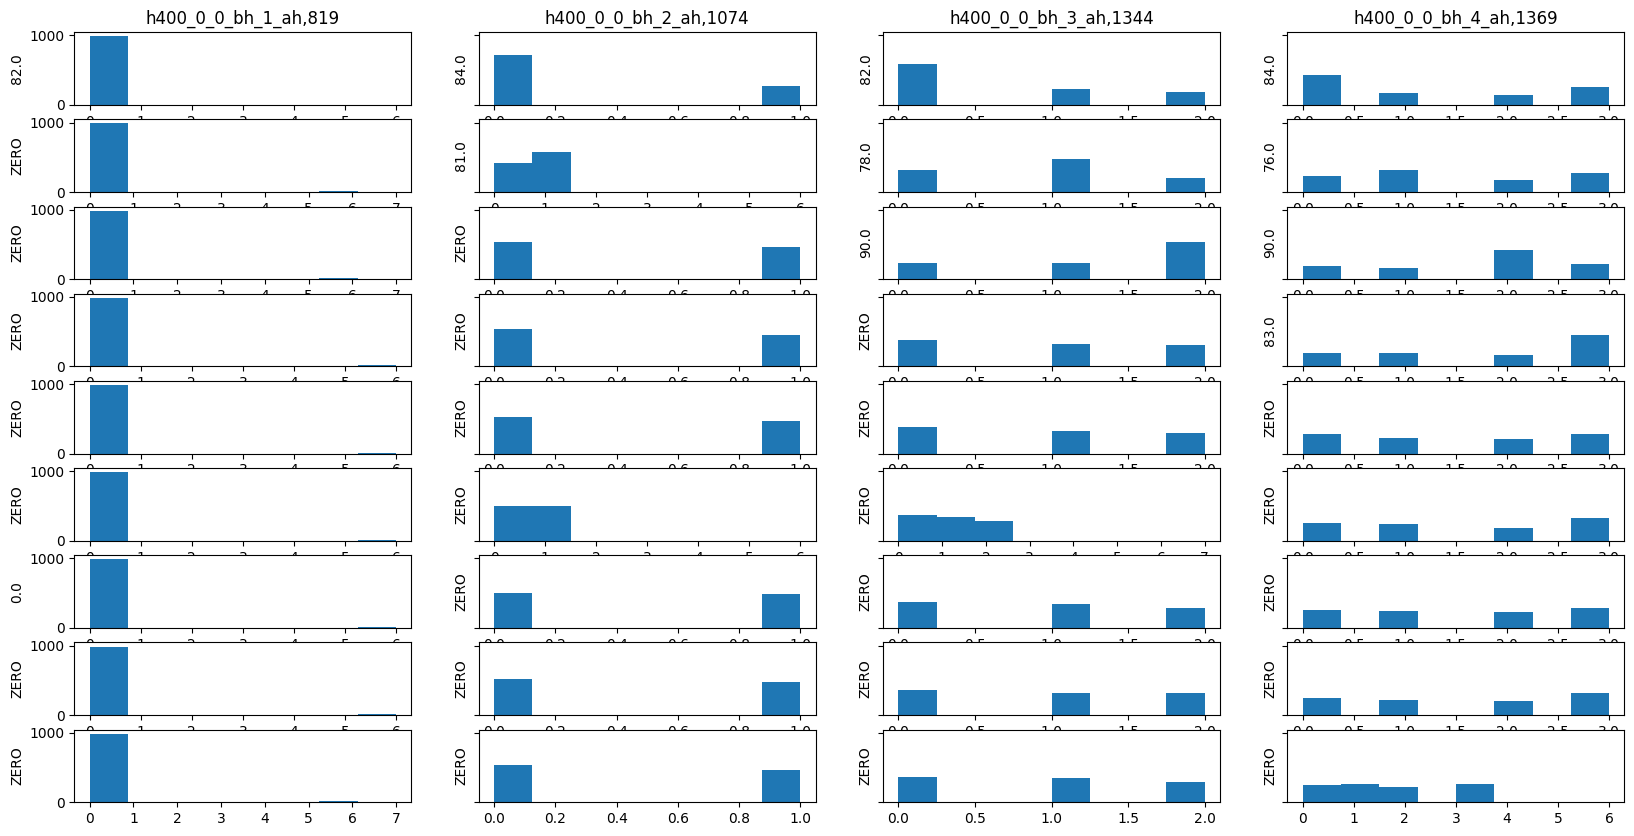

In [3]:
plot_hists([f"h400_0_0_bh_{i}_ah" for i in range(1,5)], smallheads=False, device="cuda:3")

In [11]:
import os
for i in range(8):
    os.rename(f"exp_ebms/h[400, 400, 400, 400, 400, 400, 400, 400]_0_0_bh_{i}.pth", f"exp_ebms/h400_0_0_bh_{i}_entropy.pth")

4it [01:08, 17.23s/it]


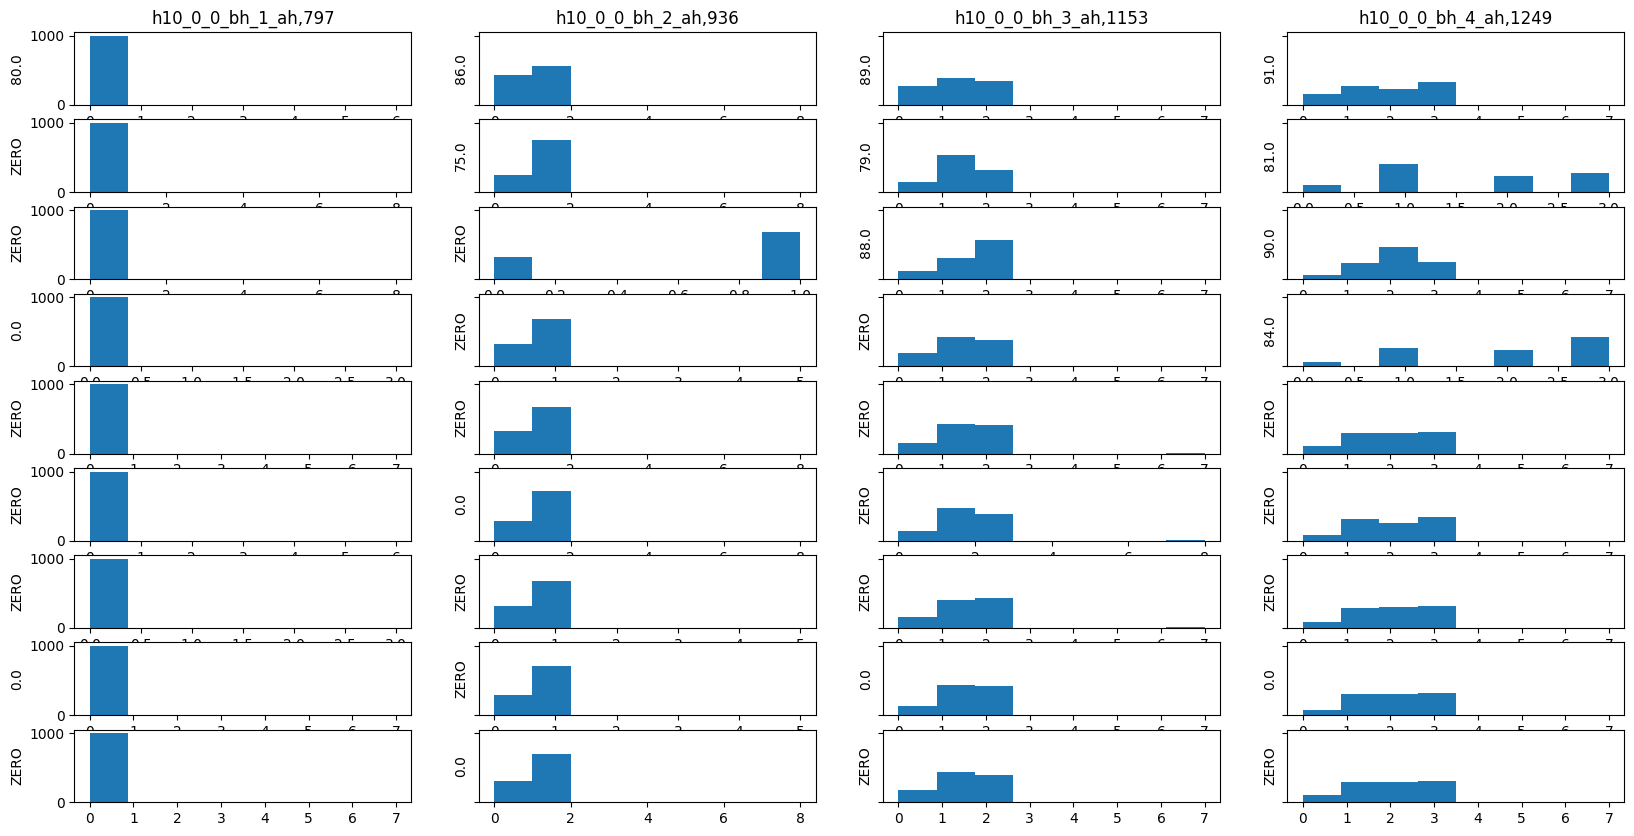

In [4]:
plot_hists([f"h10_0_0_bh_{i}_ah" for i in range(1,5)], smallheads=False, device="cuda:3")

In [20]:
list(map(lambda id: check_accs(f"1_{id}_0_0_bh", smallheads=False), range(4)))

100%|██████████| 10/10 [00:00<00:00, 10.54it/s]


[{0: 75, 1: 250, 2: 509, 3: 446, 4: 544, 5: 576, 6: 658, 7: 641, 8: 0, 9: 0},
 {0: 208, 1: 244, 2: 498, 3: 415, 4: 537, 5: 537, 6: 691, 7: 624, 8: 0, 9: 0},
 {0: 123, 1: 208, 2: 505, 3: 425, 4: 514, 5: 534, 6: 667, 7: 637, 8: 0, 9: 0},
 {0: 0, 1: 157, 2: 456, 3: 382, 4: 539, 5: 536, 6: 677, 7: 660, 8: 0, 9: 0}]

In [5]:
check_accs(f"h[100, 100, 100, 100, 100, 100, 100, 100]_0_0_bh_2", smallheads=False)

100%|██████████| 10/10 [00:00<00:00, 10.60it/s]


{0: 747, 1: 315, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}

In [10]:
p_a = []
for i in range(8):
    smallheads = False
    preds = torch.zeros(size=(10,9,1000,100))
    torch.manual_seed(1)
    np.random.seed(0)
    kwargs = {'num_workers': 1, 'pin_memory': True, 'smallheads': False}
    heads = 10 if smallheads else 100
    net2 = models_jw.HashResNet18(heads).to(device)
    net2.load_state_dict(torch.load(f"exp_ebms/h400_0_0_bh_{i}_ah.pth"))

    test_loader = getters.get_dataset(args.dataset, 1, 1000, False, kwargs)
    tasks_num = 10
    s = nn.Softmax(dim=1)
    accs =  {i: 0 for i in range(tasks_num)}
    pp, ee, ys  =[], [], []
    for task_num in range(tasks_num):
        X, y = test_loader.get_data()
        X, y = X.to(device), y.to(device)
        p, e = [], []
        for ti in range(9):       
            z = torch.zeros(10, device=device)
            z[ti] = 1
            y_hat, _, _ = net2(X, z)
            preds[task_num, ti] = y_hat.detach().cpu()
    p_a.append(preds)

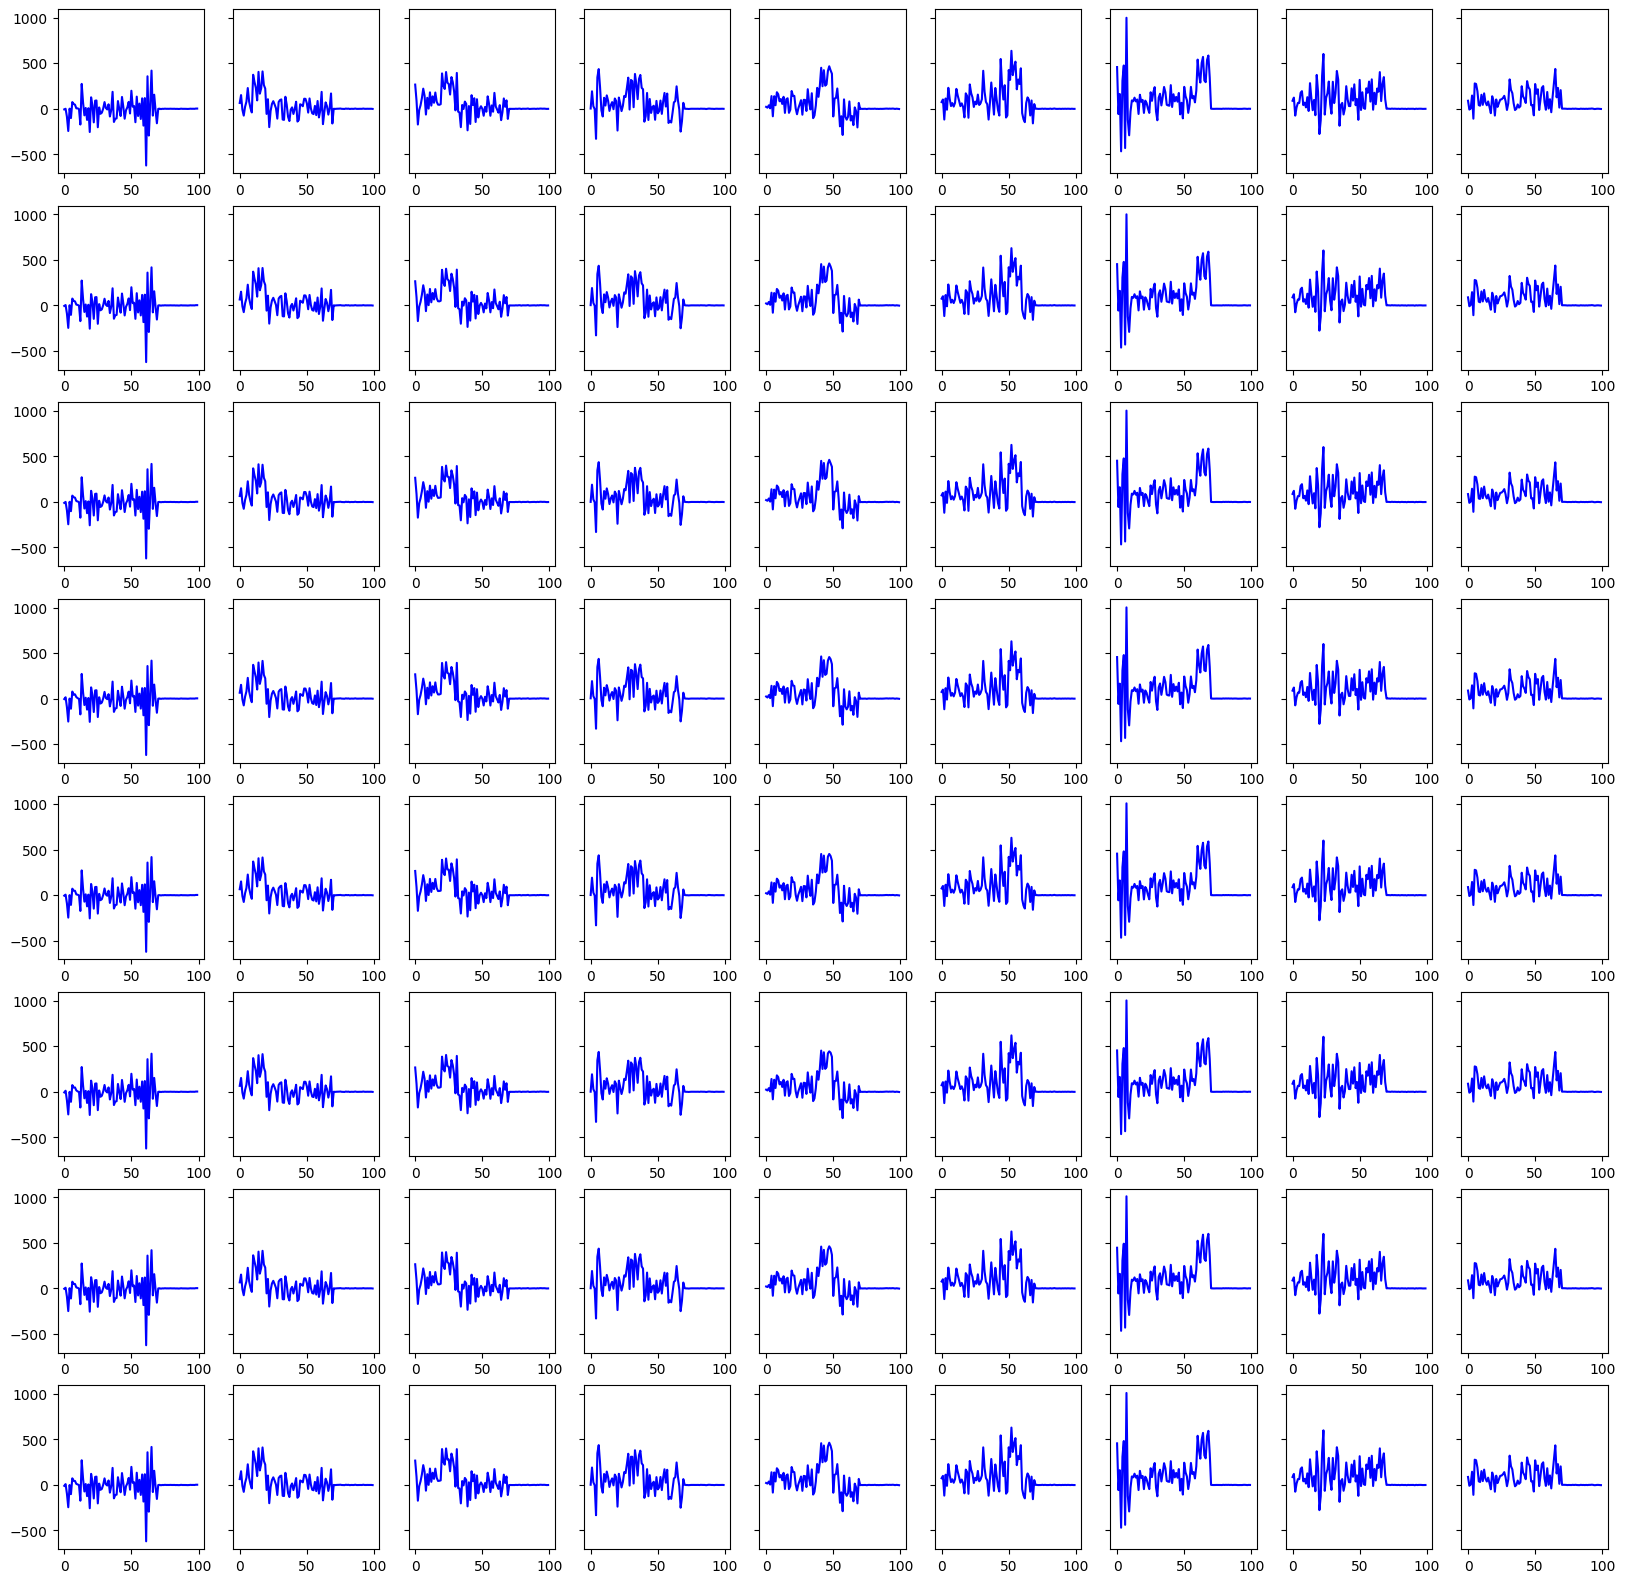

In [12]:
task_num = 8
for i in range(7,8):
    fig, axs = plt.subplots(task_num, 9, figsize=(20,20), sharey=True)
    for tn in range(task_num):
        for z in range(9):
            axs[tn,z].plot(p_a[i][tn][z].mean(0), c="b")#*discount[z])
            #axs[tn,z].plot(p_a[i][tn][z].mean(0)-preds[tn][z].std(0), c="b", alpha=0.5)#*discount[z])
            #axs[tn,z].plot(p_a[i][tn][z].mean(0)+preds[tn][z].std(0), c="b", alpha=0.5)#*discount[z])
    plt.show()
    plt.close()

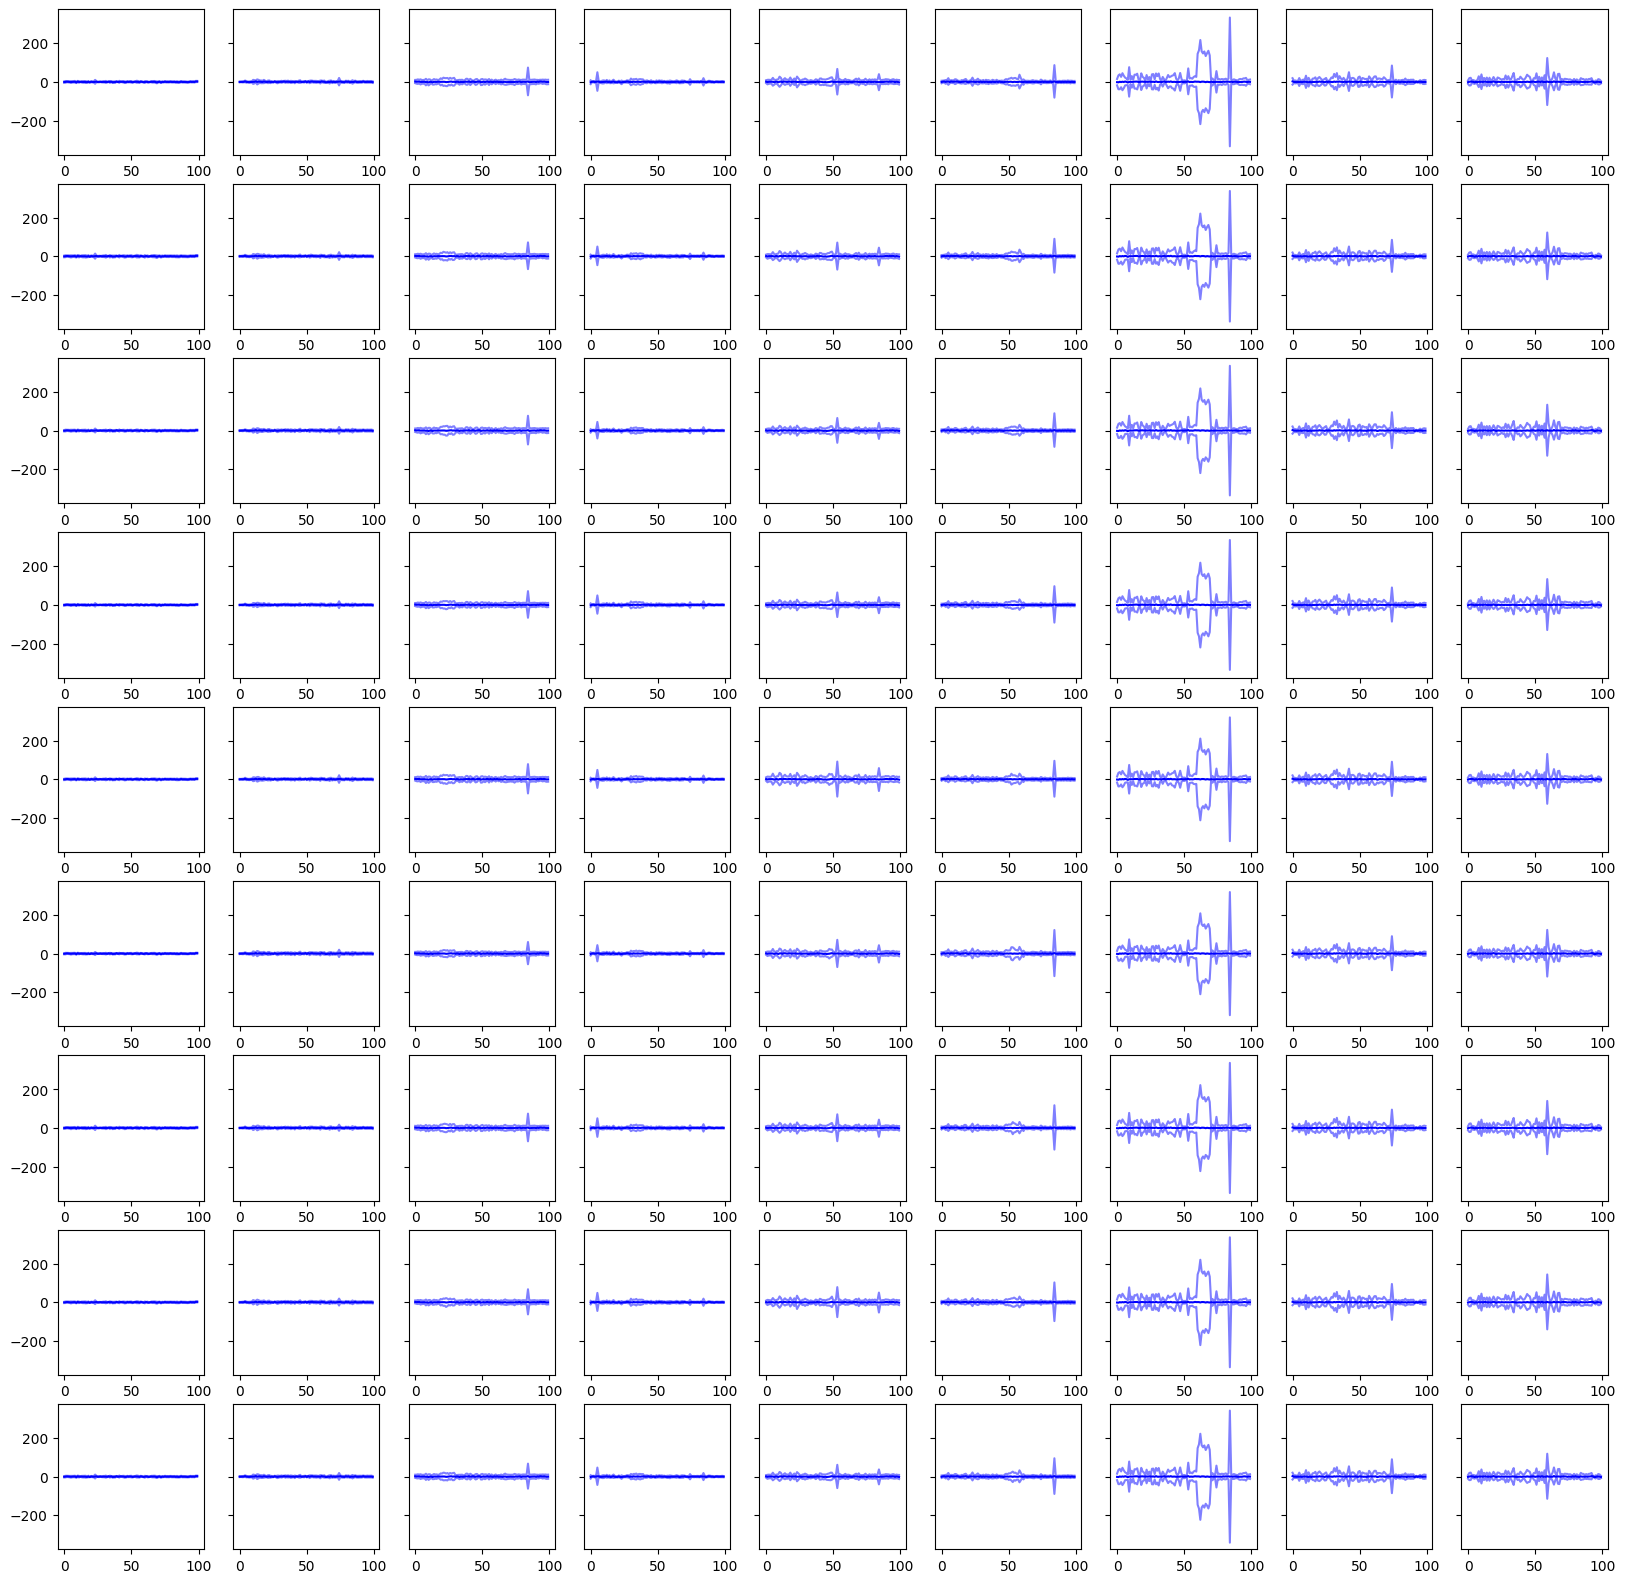

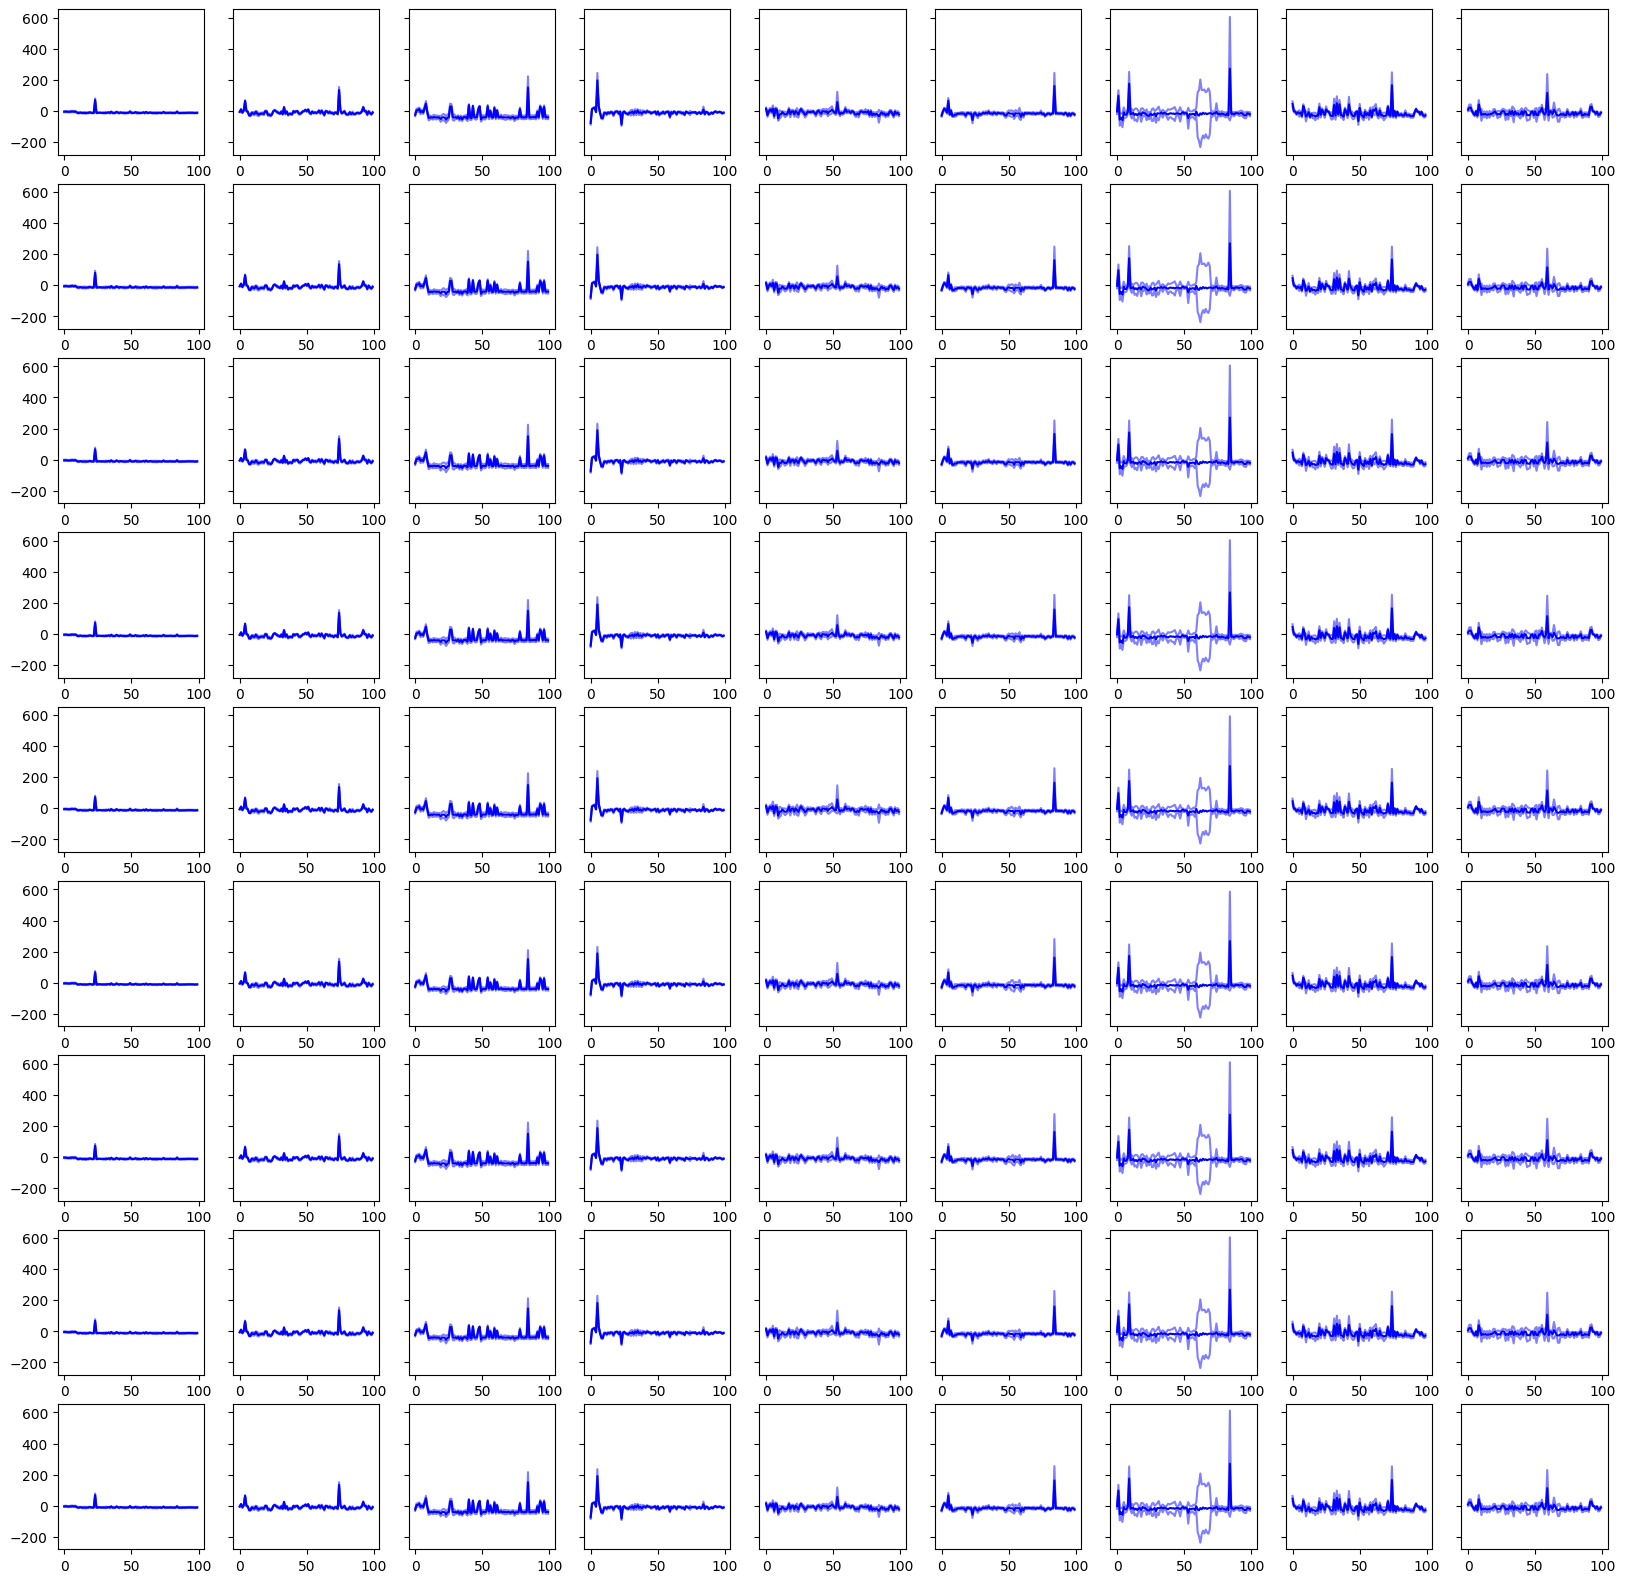

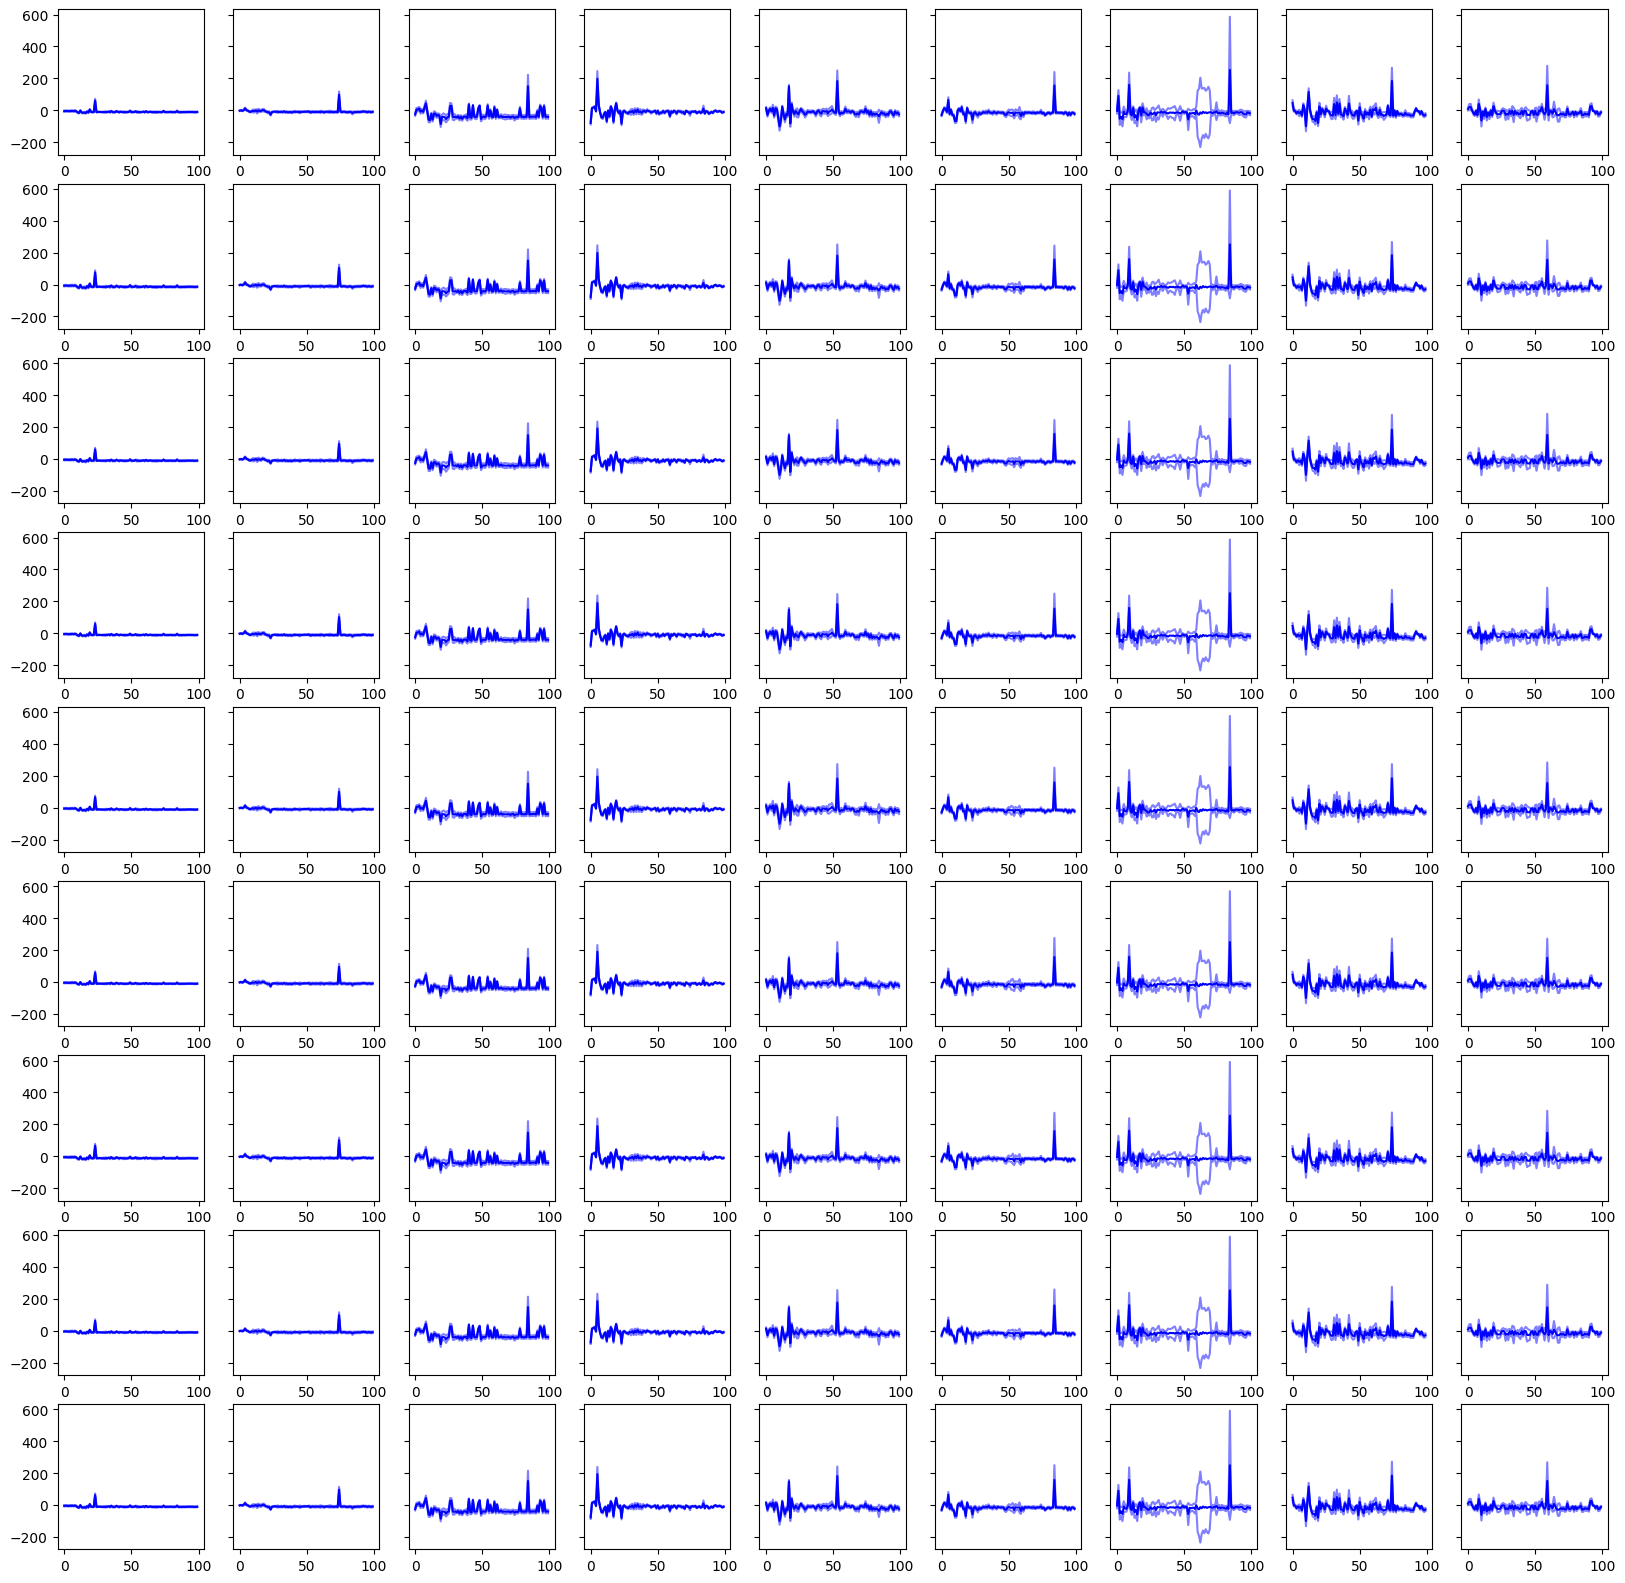

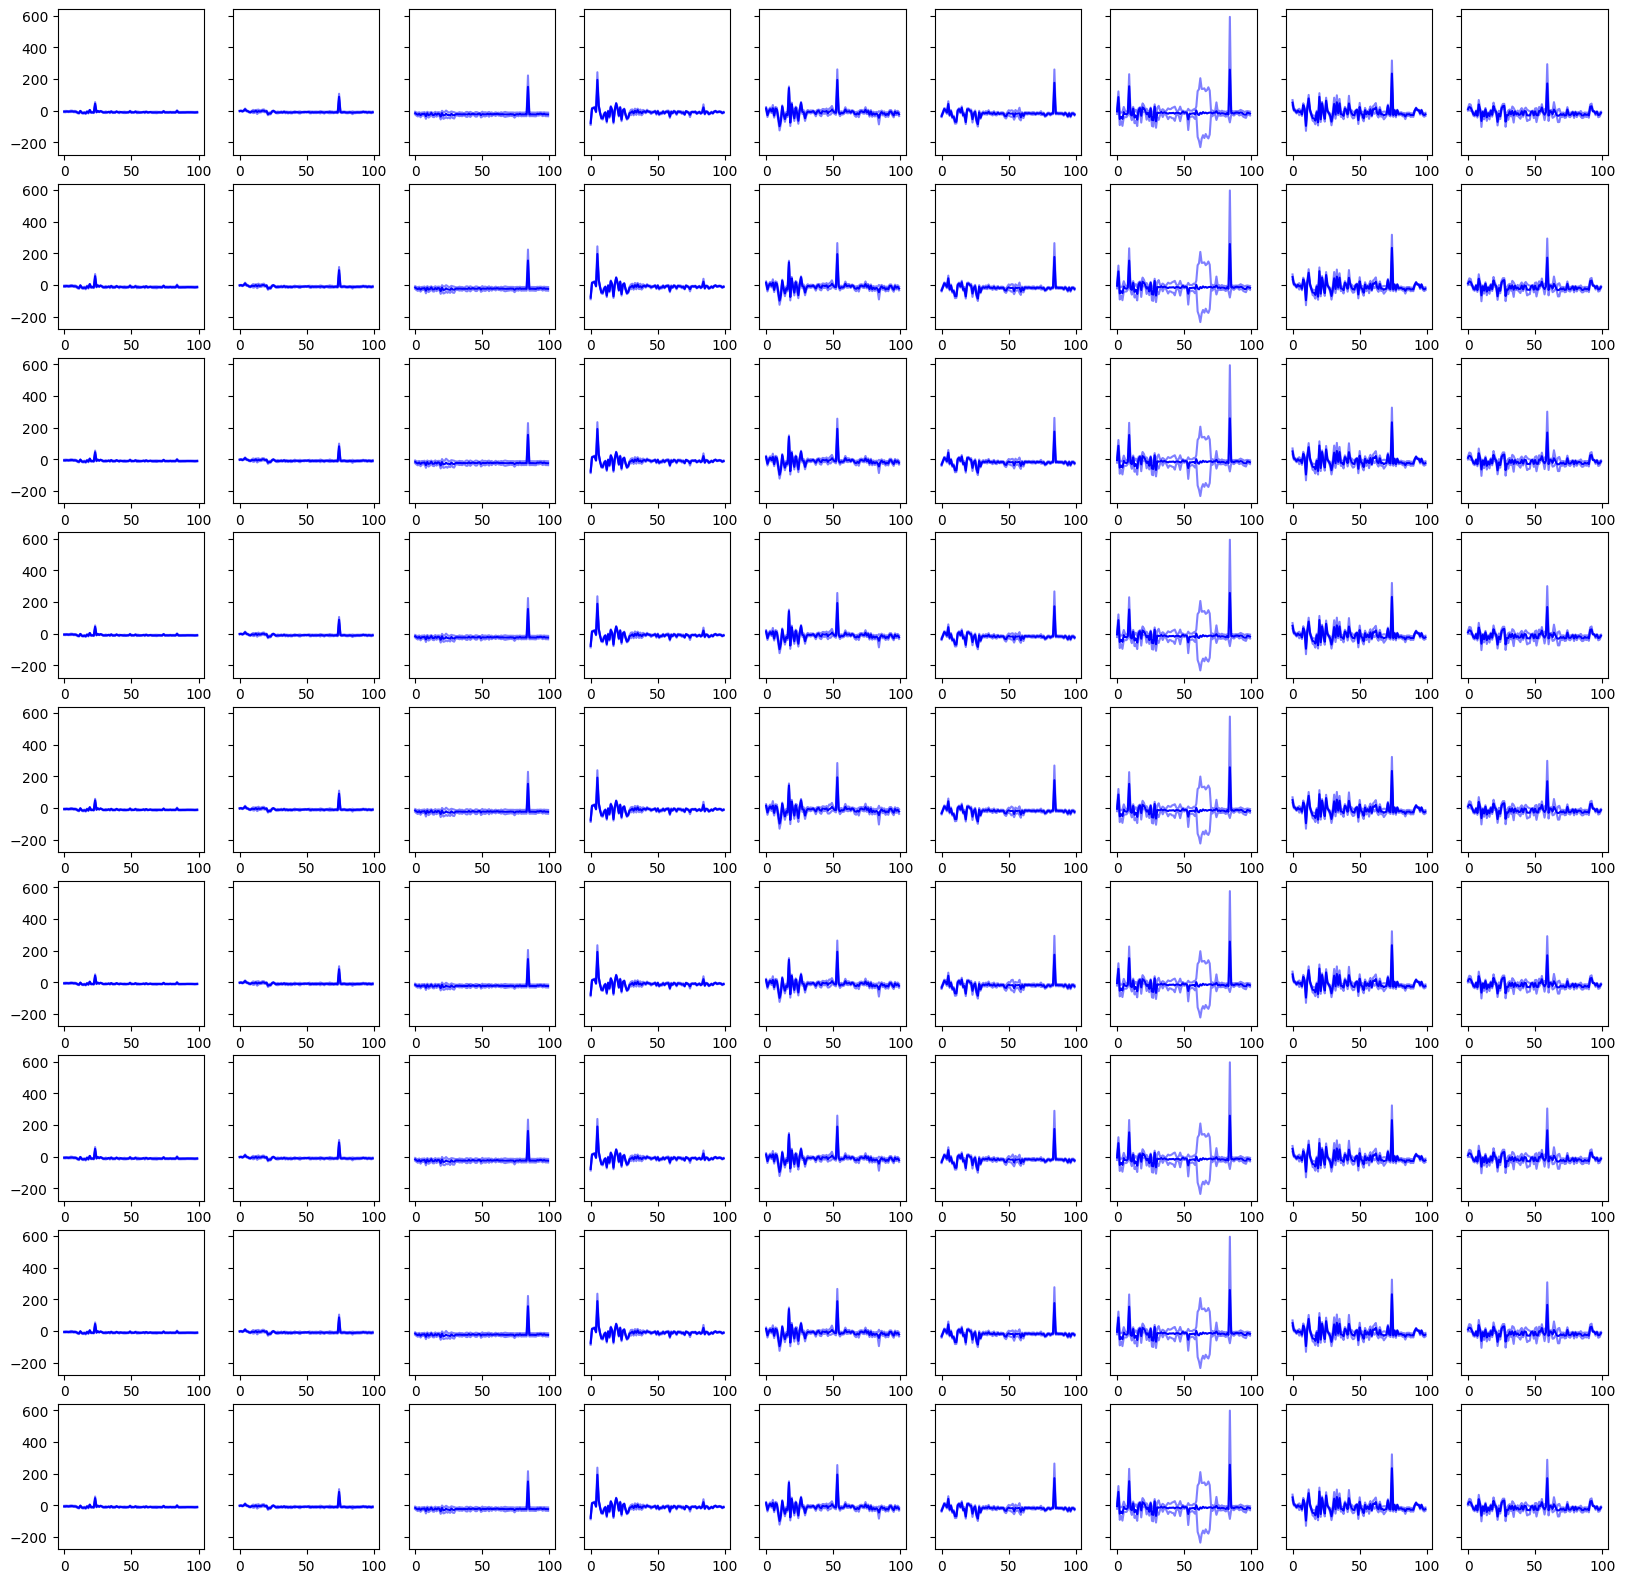

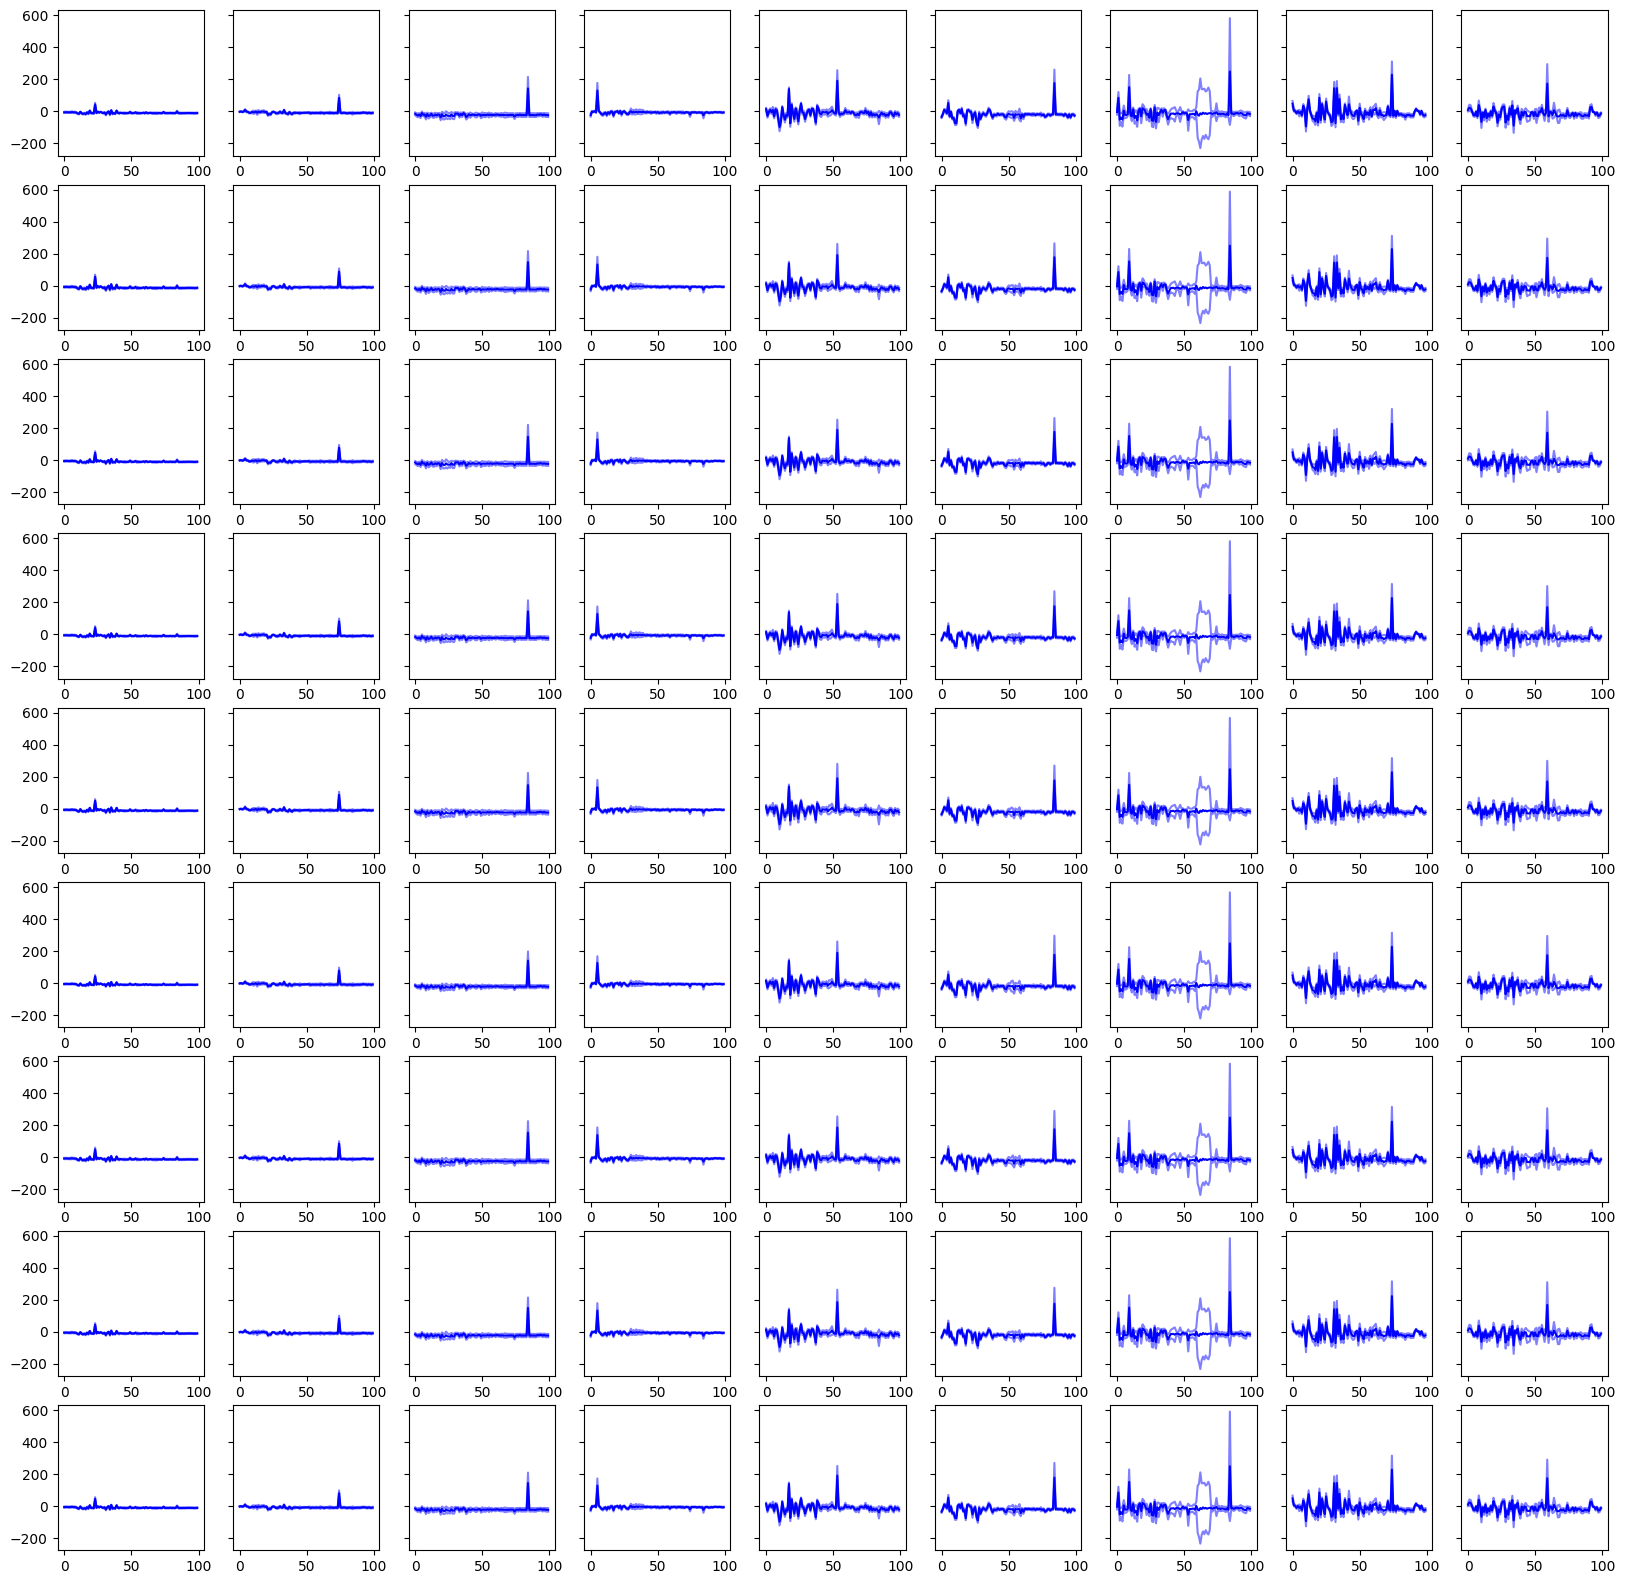

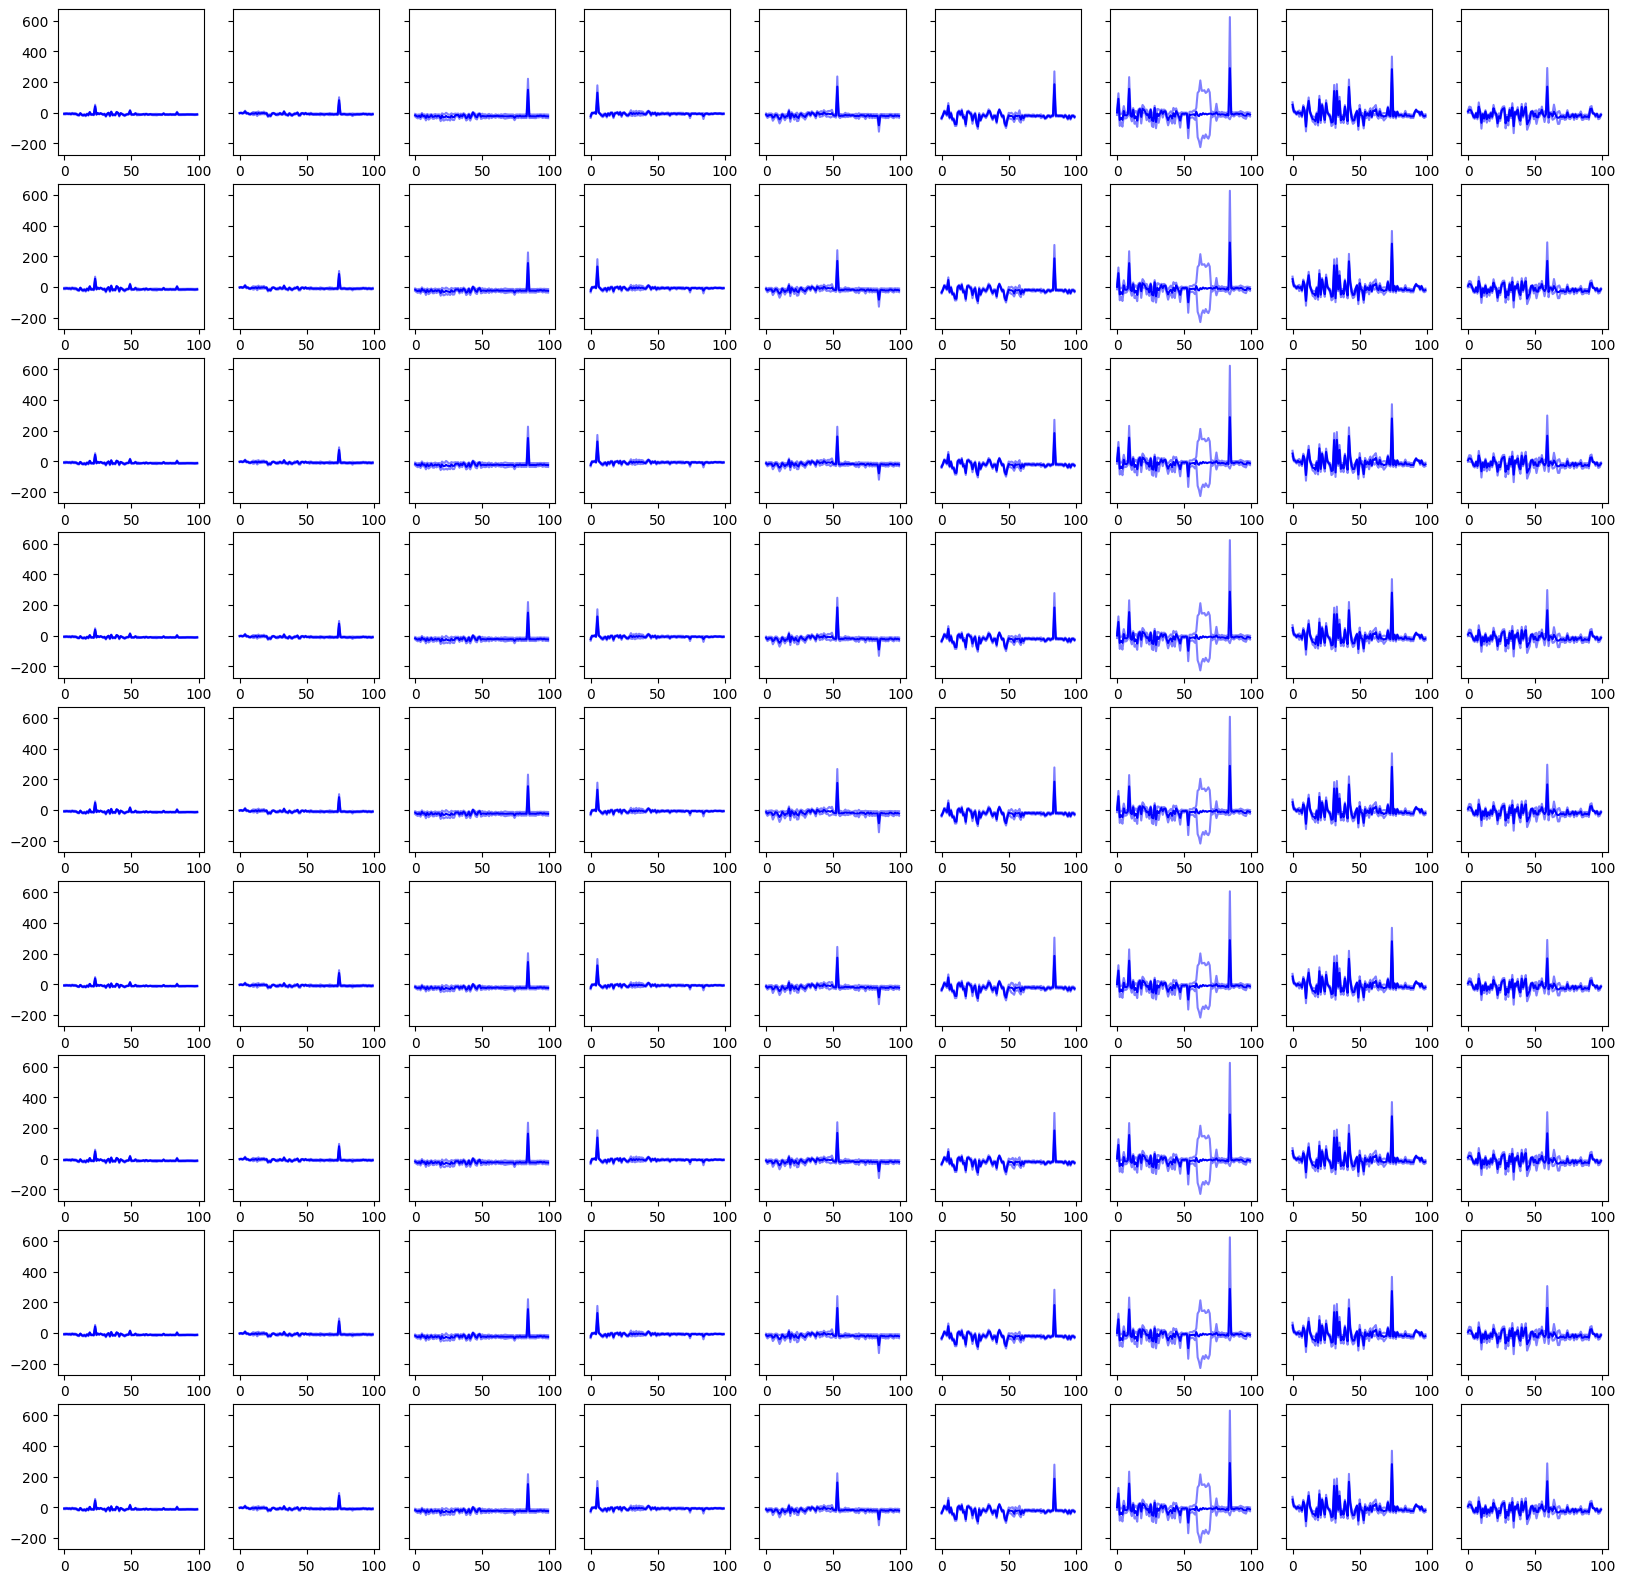

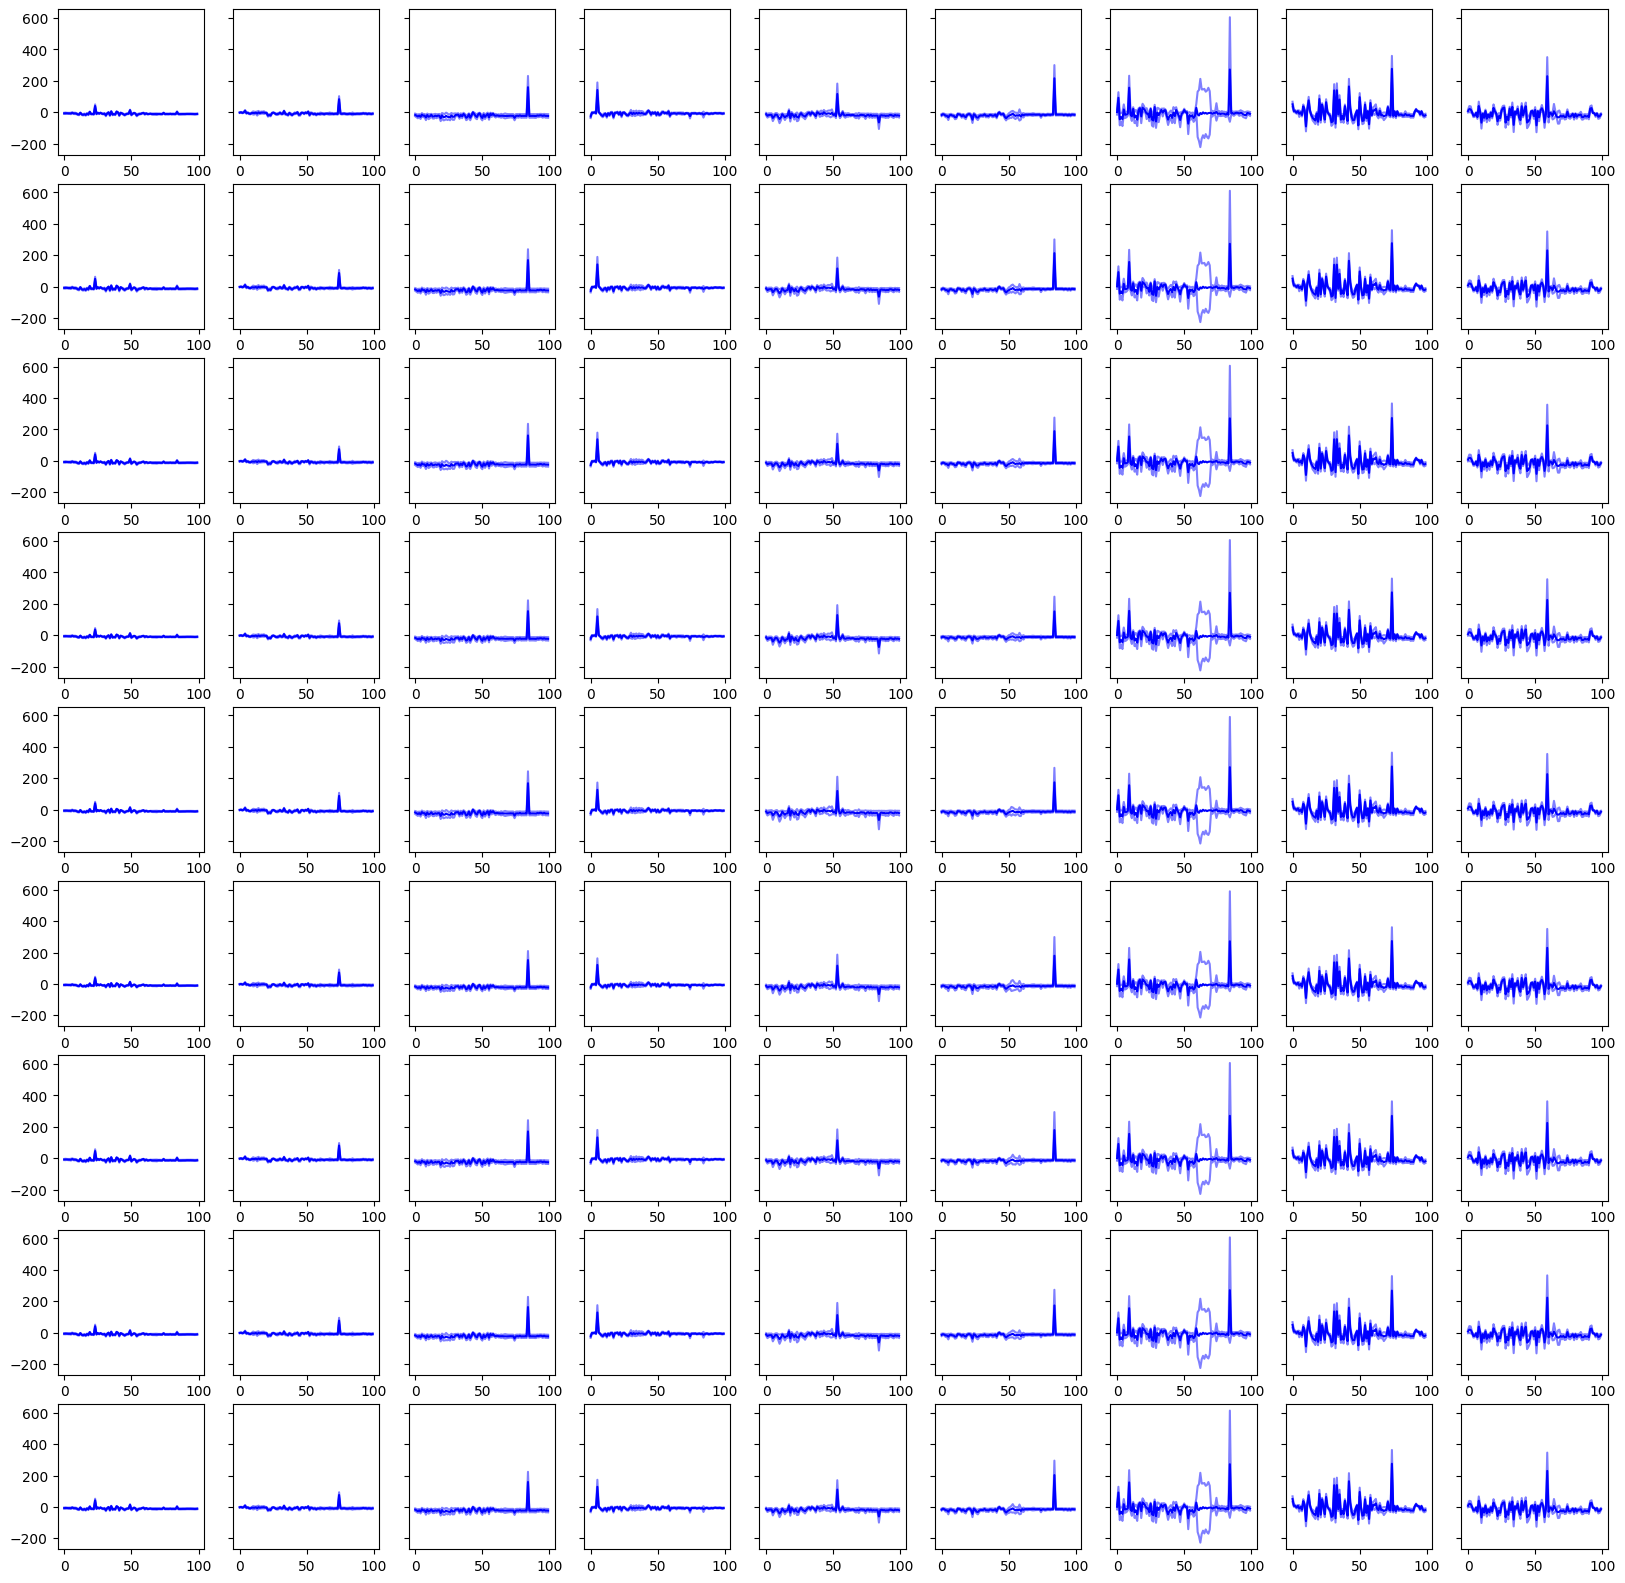

Exception ignored in: <function WeakSet.__init__.<locals>._remove at 0x7f857c022dd0>
Traceback (most recent call last):
  File "/usr/lib/python3.10/_weakrefset.py", line 39, in _remove
    def _remove(item, selfref=ref(self)):
KeyboardInterrupt: 


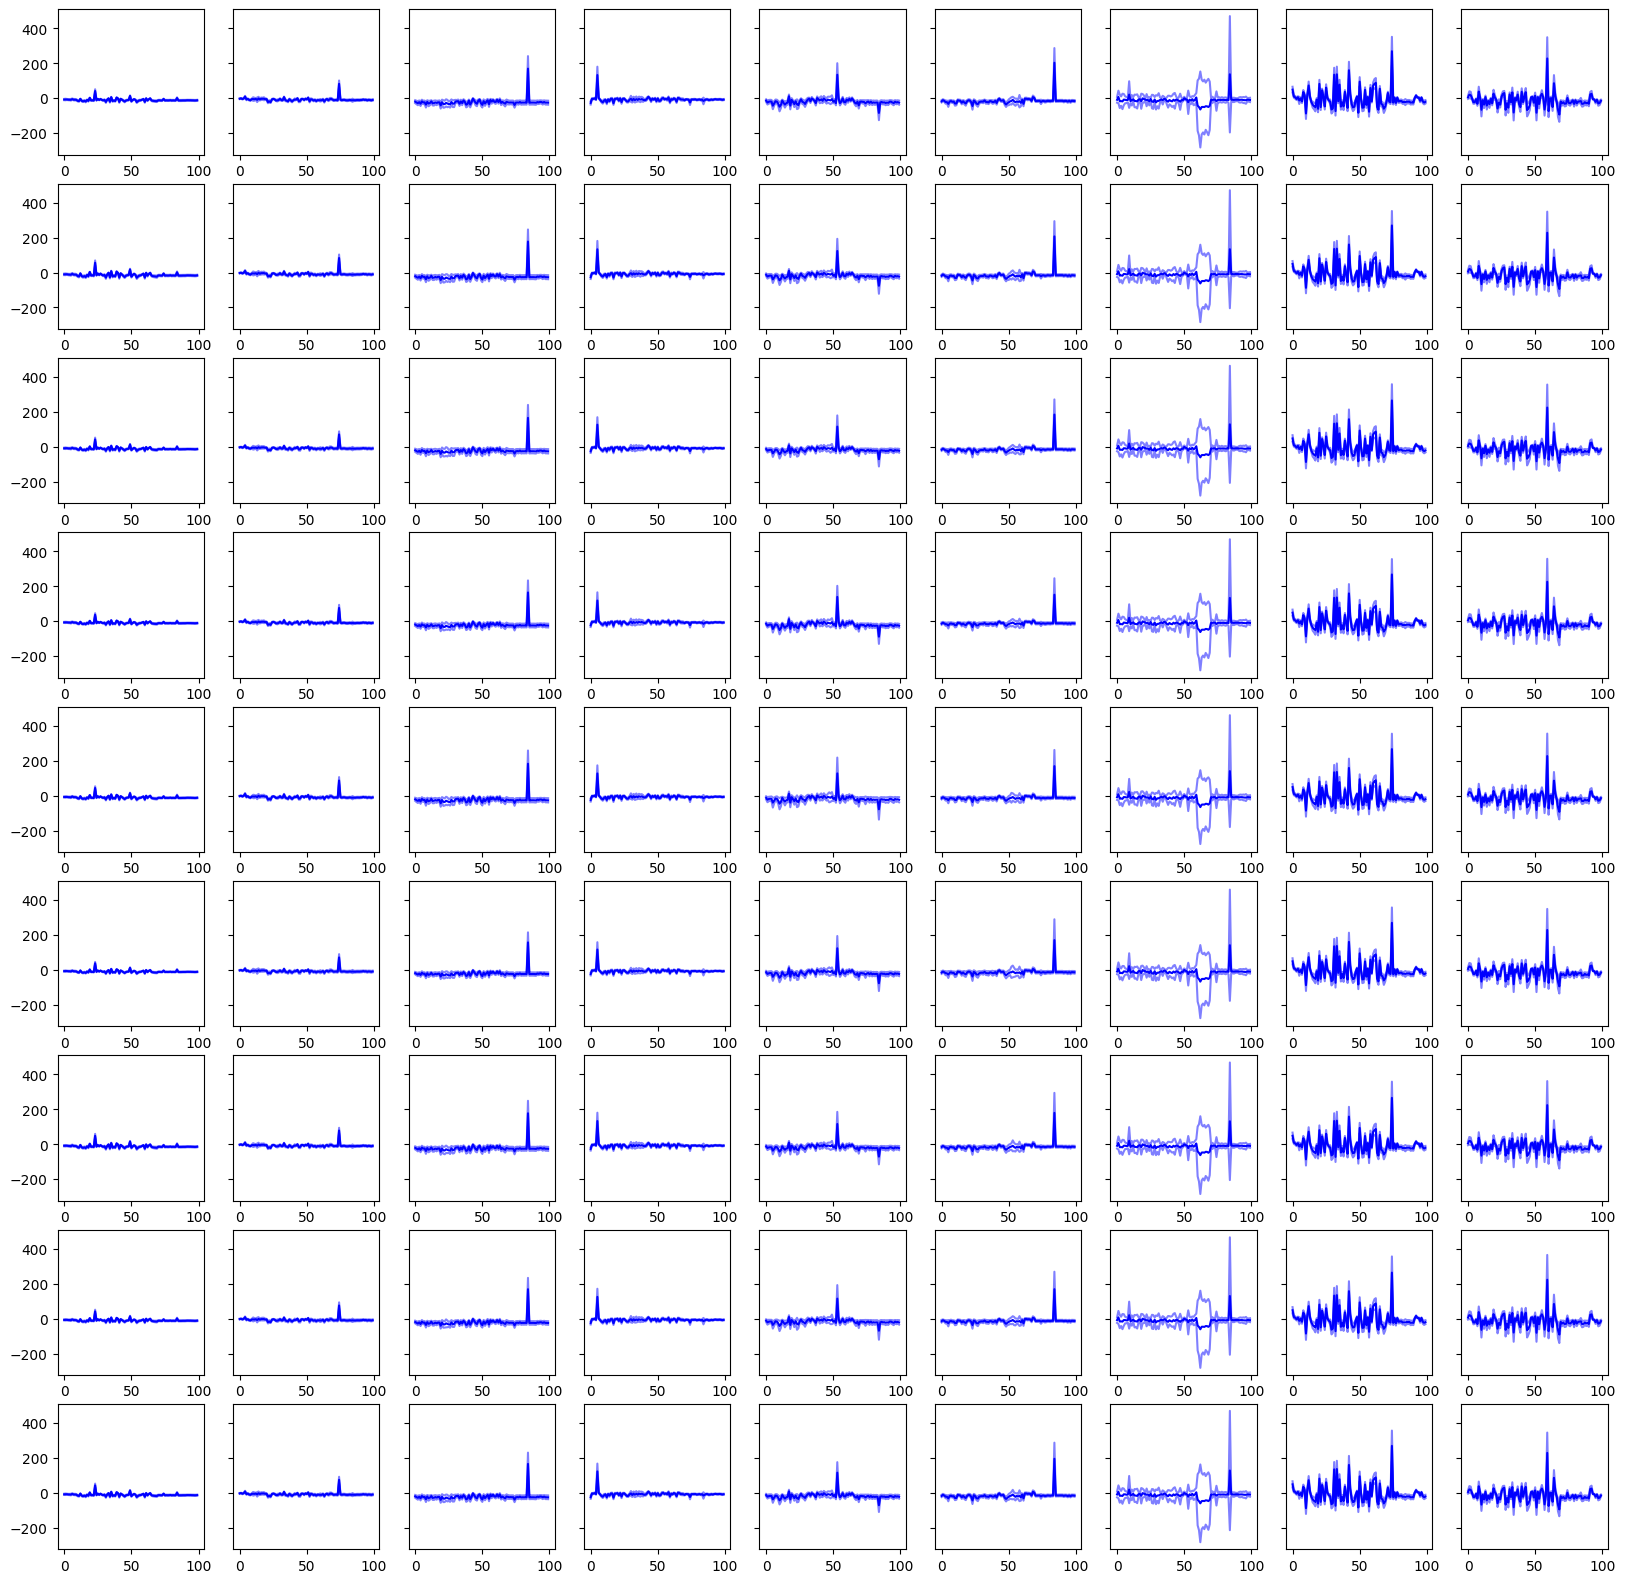

In [ ]:
for i in range(8):
    fig, axs = plt.subplots(task_num, 9, figsize=(20,20), sharey=True)
    for tn in range(task_num):
        for z in range(9):
            axs[tn,z].plot(p_a[i][tn][z].mean(0), c="b")#*discount[z])
            axs[tn,z].plot(p_a[i][tn][z].mean(0)-preds[tn][z].std(0), c="b", alpha=0.5)#*discount[z])
            axs[tn,z].plot(p_a[i][tn][z].mean(0)+preds[tn][z].std(0), c="b", alpha=0.5)#*discount[z])
    plt.show()
    plt.close()

In [2]:
smallheads = False
preds = torch.zeros(size=(10,9,1000,100))
torch.manual_seed(1)
np.random.seed(0)
kwargs = {'num_workers': 1, 'pin_memory': True, 'smallheads': False}
heads = 10 if smallheads else 100
net2 = models_jw.HashResNet18(heads).to(device)
net2.load_state_dict(torch.load(f"ebms/ce_0_0_bh_constrainedSoftmax.pth"))

test_loader = getters.get_dataset(args.dataset, 1, 1000, False, kwargs)
tasks_num = 10
s = nn.Softmax(dim=1)
accs =  {i: 0 for i in range(tasks_num)}
pp, ee, ys  =[], [], []
for task_num in range(tasks_num):
    X, y = test_loader.get_data()
    X, y = X.to(device), y.to(device)
    p, e = [], []
    for ti in range(9):       
        z = torch.zeros(10, device=device)
        z[ti] = 1
        y_hat, _, _ = net2(X, z)
        preds[task_num, ti] = y_hat.detach().cpu()


Files already downloaded and verified
Files already downloaded and verified


In [35]:
# z inference
# energies after each task

7it [01:04,  9.25s/it]


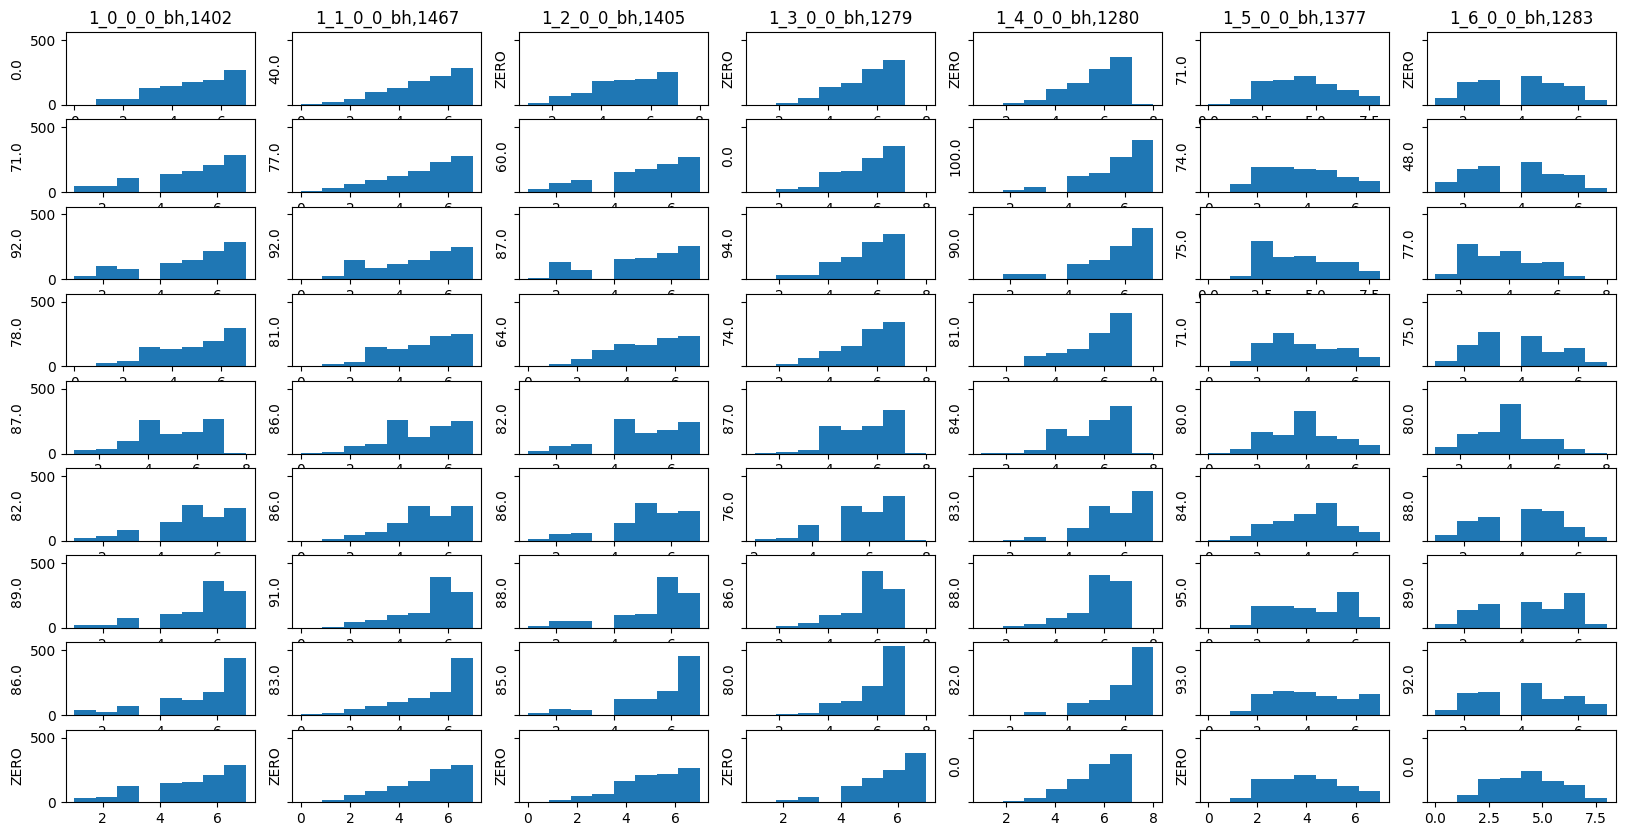

In [36]:
def plot_hists2(listt, task_val_num = 9, smallheads=False):
    torch.manual_seed(1)
    np.random.seed(0)
    _, axs = plt.subplots(task_val_num,len(listt), sharey=True, figsize=(20,10))
    for idx, path in  tqdm(enumerate(listt)):
        kwargs = {'num_workers': 1, 'pin_memory': True, 'smallheads': smallheads}
        heads = 10 if smallheads else 100
        net2 = models_jw.HashResNet18(heads).to(device)
        net2.load_state_dict(torch.load(f"ebms/{path}.pth"))

        test_loader = getters.get_dataset(args.dataset, 1, 1000, False, kwargs)
        tasks_num = 10
        s = nn.Softmax(dim=1)
        accs =  {i: 0 for i in range(tasks_num)}
        pp, ee, ys  =[], [], []
        for task_num in range(tasks_num):
            X, y = test_loader.get_data()
            X, y = X.to(device), y.to(device)
            p, e = [], []
            for ti in range(task_val_num):       
                z = torch.zeros(10, device=device)
                z[ti] = 1
                y_hat, _, _ = net2(X, z)
                p.append(y_hat.detach().cpu())
                e.append(entropy(s(-y_hat.detach().cpu())))
            pp.append(p)
            ee.append(e)
            ys.append(y.detach().cpu())
        
        y_preds = []
        buff = []
        for k in range(task_val_num):
            mins, mins_idxs=[],[]
            for i in range(task_val_num):
                mins.append((pp[k][i]*discount[i]).min(1).values)
                mins_idxs.append((pp[k][i]*discount[i]).min(1).indices)
            predicted_task_num = torch.stack(mins).min(0).indices
            buff.append(torch.stack(mins))
            y_pred, task_pred = 0, 0
            for ii in range(1000):
                if predicted_task_num[ii] == k:
                    task_pred+=1
                if (torch.stack(mins_idxs)[predicted_task_num[ii], ii] == ys[k][ii]) and  (predicted_task_num[ii] == k):
                    y_pred += 1  
            y_preds.append(y_pred)
            axs[k,idx].hist(predicted_task_num,bins=8)
            y_label = "ZERO" if task_pred == 0 else np.round(y_pred/task_pred*100,0)
            axs[k,idx].set_ylabel(y_label)
        axs[0,idx].set_title(f"{path},{sum(y_preds)}")

plot_hists2([f"1_{i}_0_0_bh" for i in range(7)], smallheads=False)

In [37]:
mm=1.5
discount = np.arange(1,mm,(mm-1)/9)

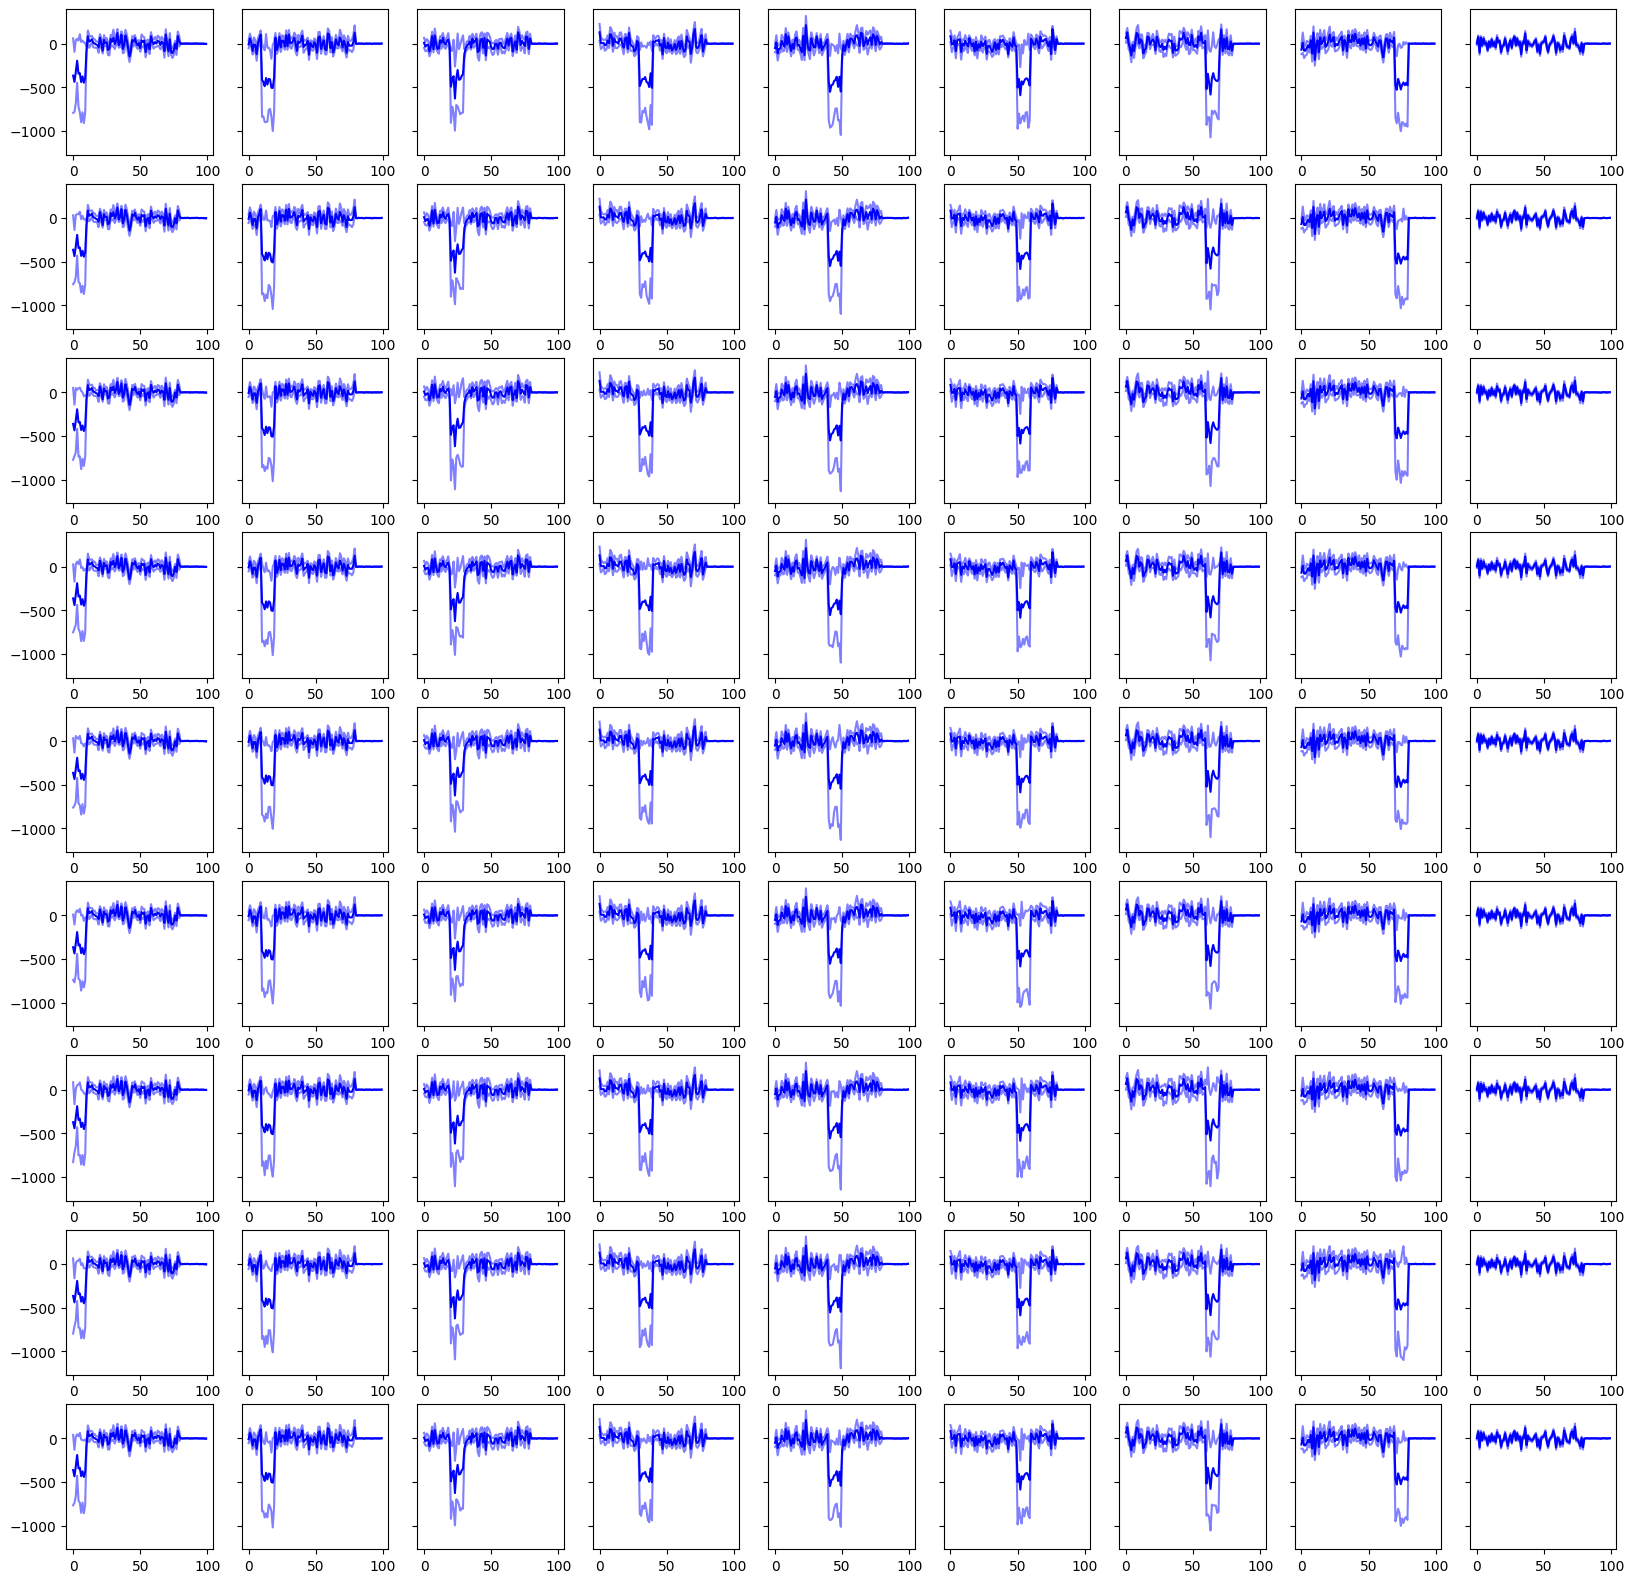

In [7]:
# mean energies rows = tasks cols = contexts
fig, axs = plt.subplots(task_num, 9, figsize=(20,20), sharey=True)
for tn in range(task_num):
    for z in range(9):
        axs[tn,z].plot(-preds[tn][z].mean(0), c="b")#*discount[z])
        axs[tn,z].plot(-preds[tn][z].mean(0)-preds[tn][z].std(0), c="b", alpha=0.5)#*discount[z])
        axs[tn,z].plot(-preds[tn][z].mean(0)+preds[tn][z].std(0), c="b", alpha=0.5)#*discount[z])

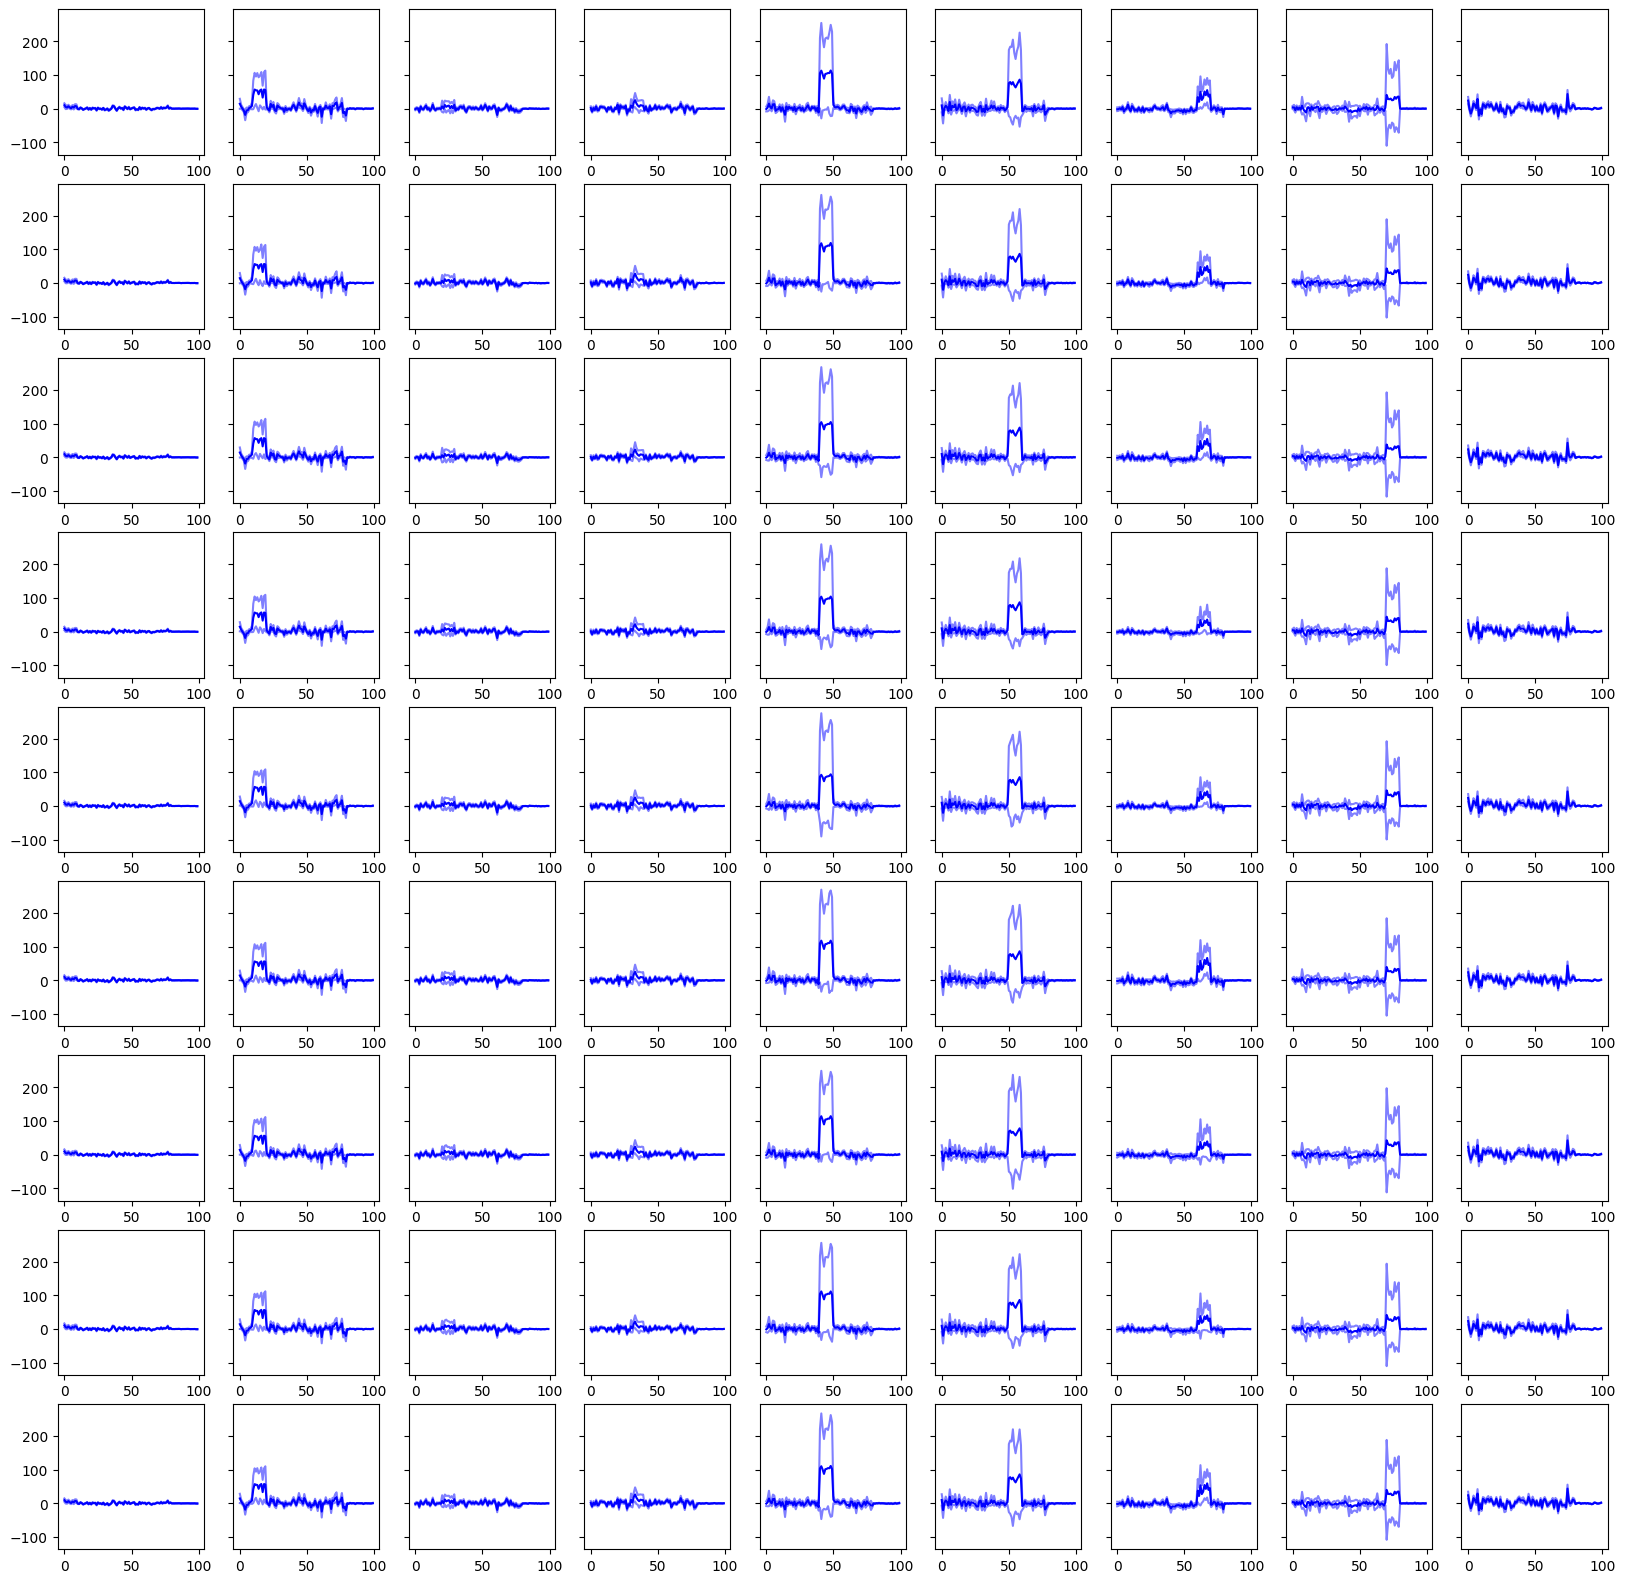

In [3]:
# mean energies rows = tasks cols = contexts (bh - constrained)
fig, axs = plt.subplots(task_num, 9, figsize=(20,20), sharey=True)
for tn in range(task_num):
    for z in range(9):
        axs[tn,z].plot(-preds[tn][z].mean(0), c="b")#*discount[z])
        axs[tn,z].plot(-preds[tn][z].mean(0)-preds[tn][z].std(0), c="b", alpha=0.5)#*discount[z])
        axs[tn,z].plot(-preds[tn][z].mean(0)+preds[tn][z].std(0), c="b", alpha=0.5)#*discount[z])

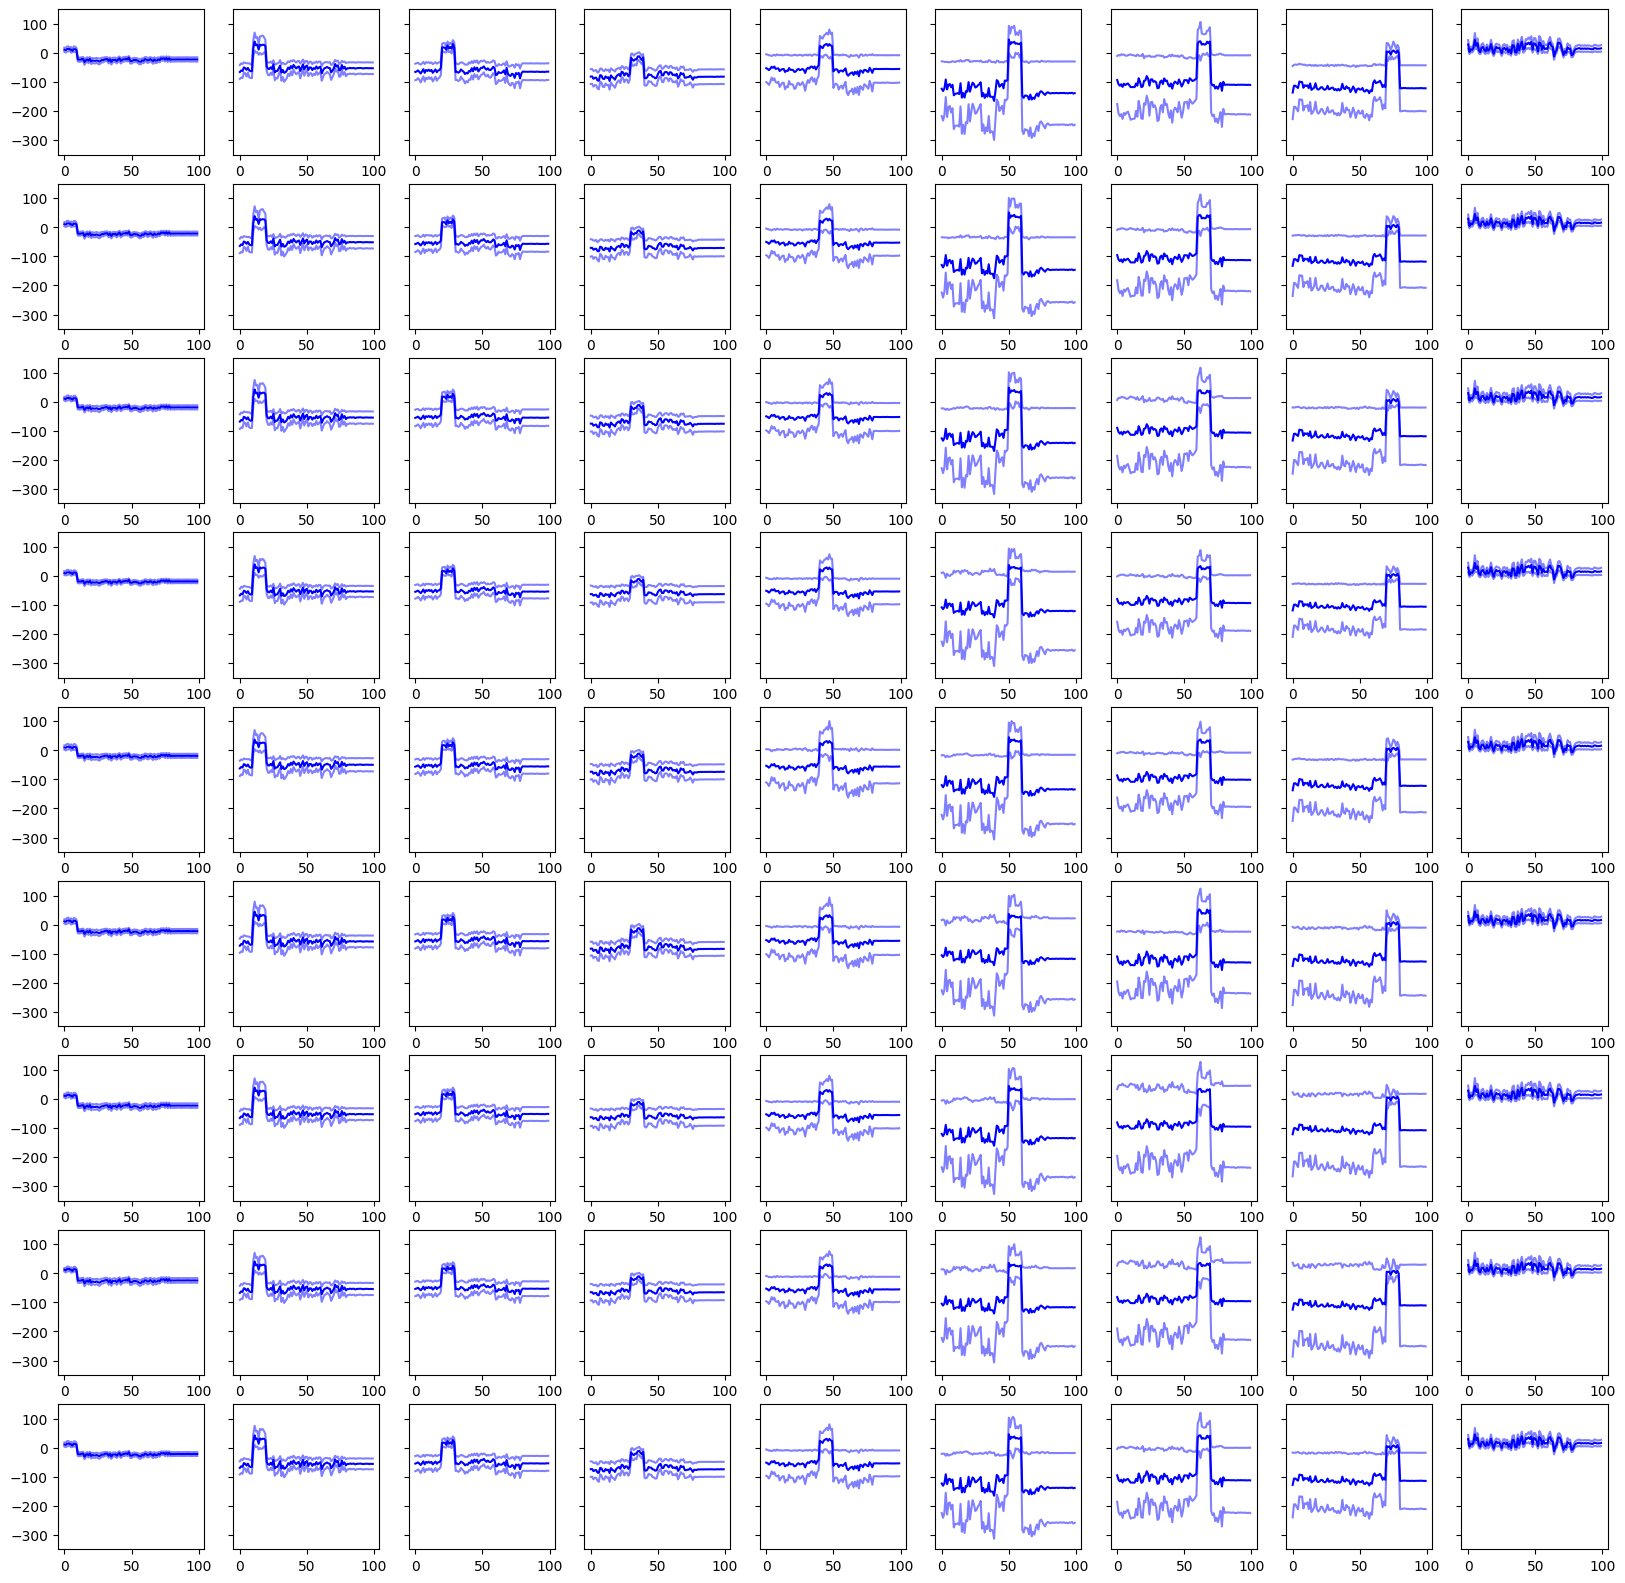

In [4]:
# mean energies rows = tasks cols = contexts
fig, axs = plt.subplots(task_num, 9, figsize=(20,20), sharey=True)
for tn in range(task_num):
    for z in range(9):
        axs[tn,z].plot(-preds[tn][z].mean(0), c="b")#*discount[z])
        axs[tn,z].plot(-preds[tn][z].mean(0)-preds[tn][z].std(0), c="b", alpha=0.5)#*discount[z])
        axs[tn,z].plot(-preds[tn][z].mean(0)+preds[tn][z].std(0), c="b", alpha=0.5)#*discount[z])

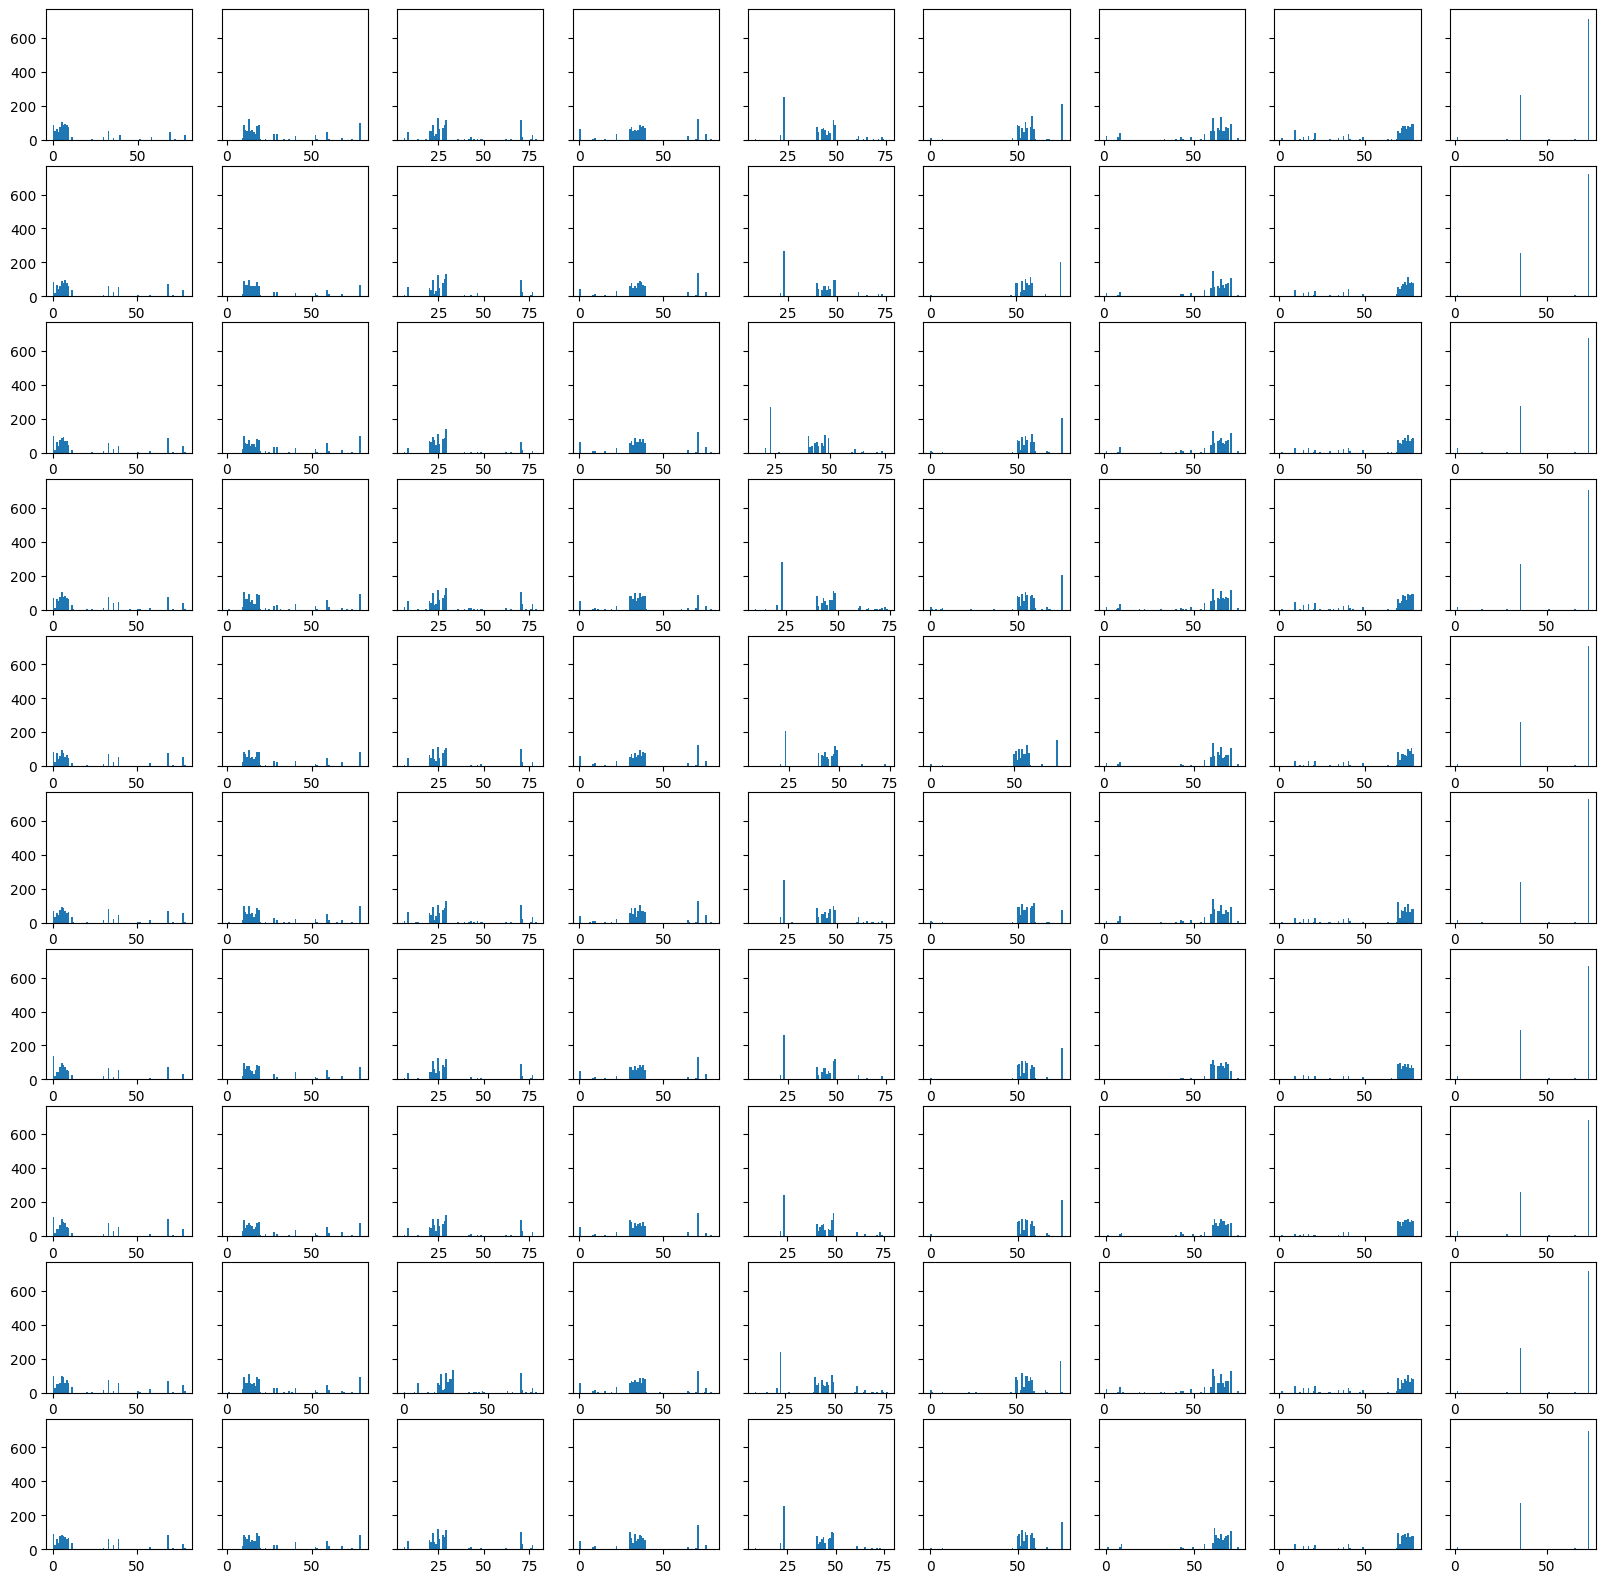

In [9]:
#distribuion of predictions cols = tasks, rows = contexs

_, axs = plt.subplots(10, 9, figsize=(20,20), sharey=True)
for i in range(10):
    for j in range(9):
        axs[i, j].hist(preds[:,j].min(2).indices[i], bins=80)

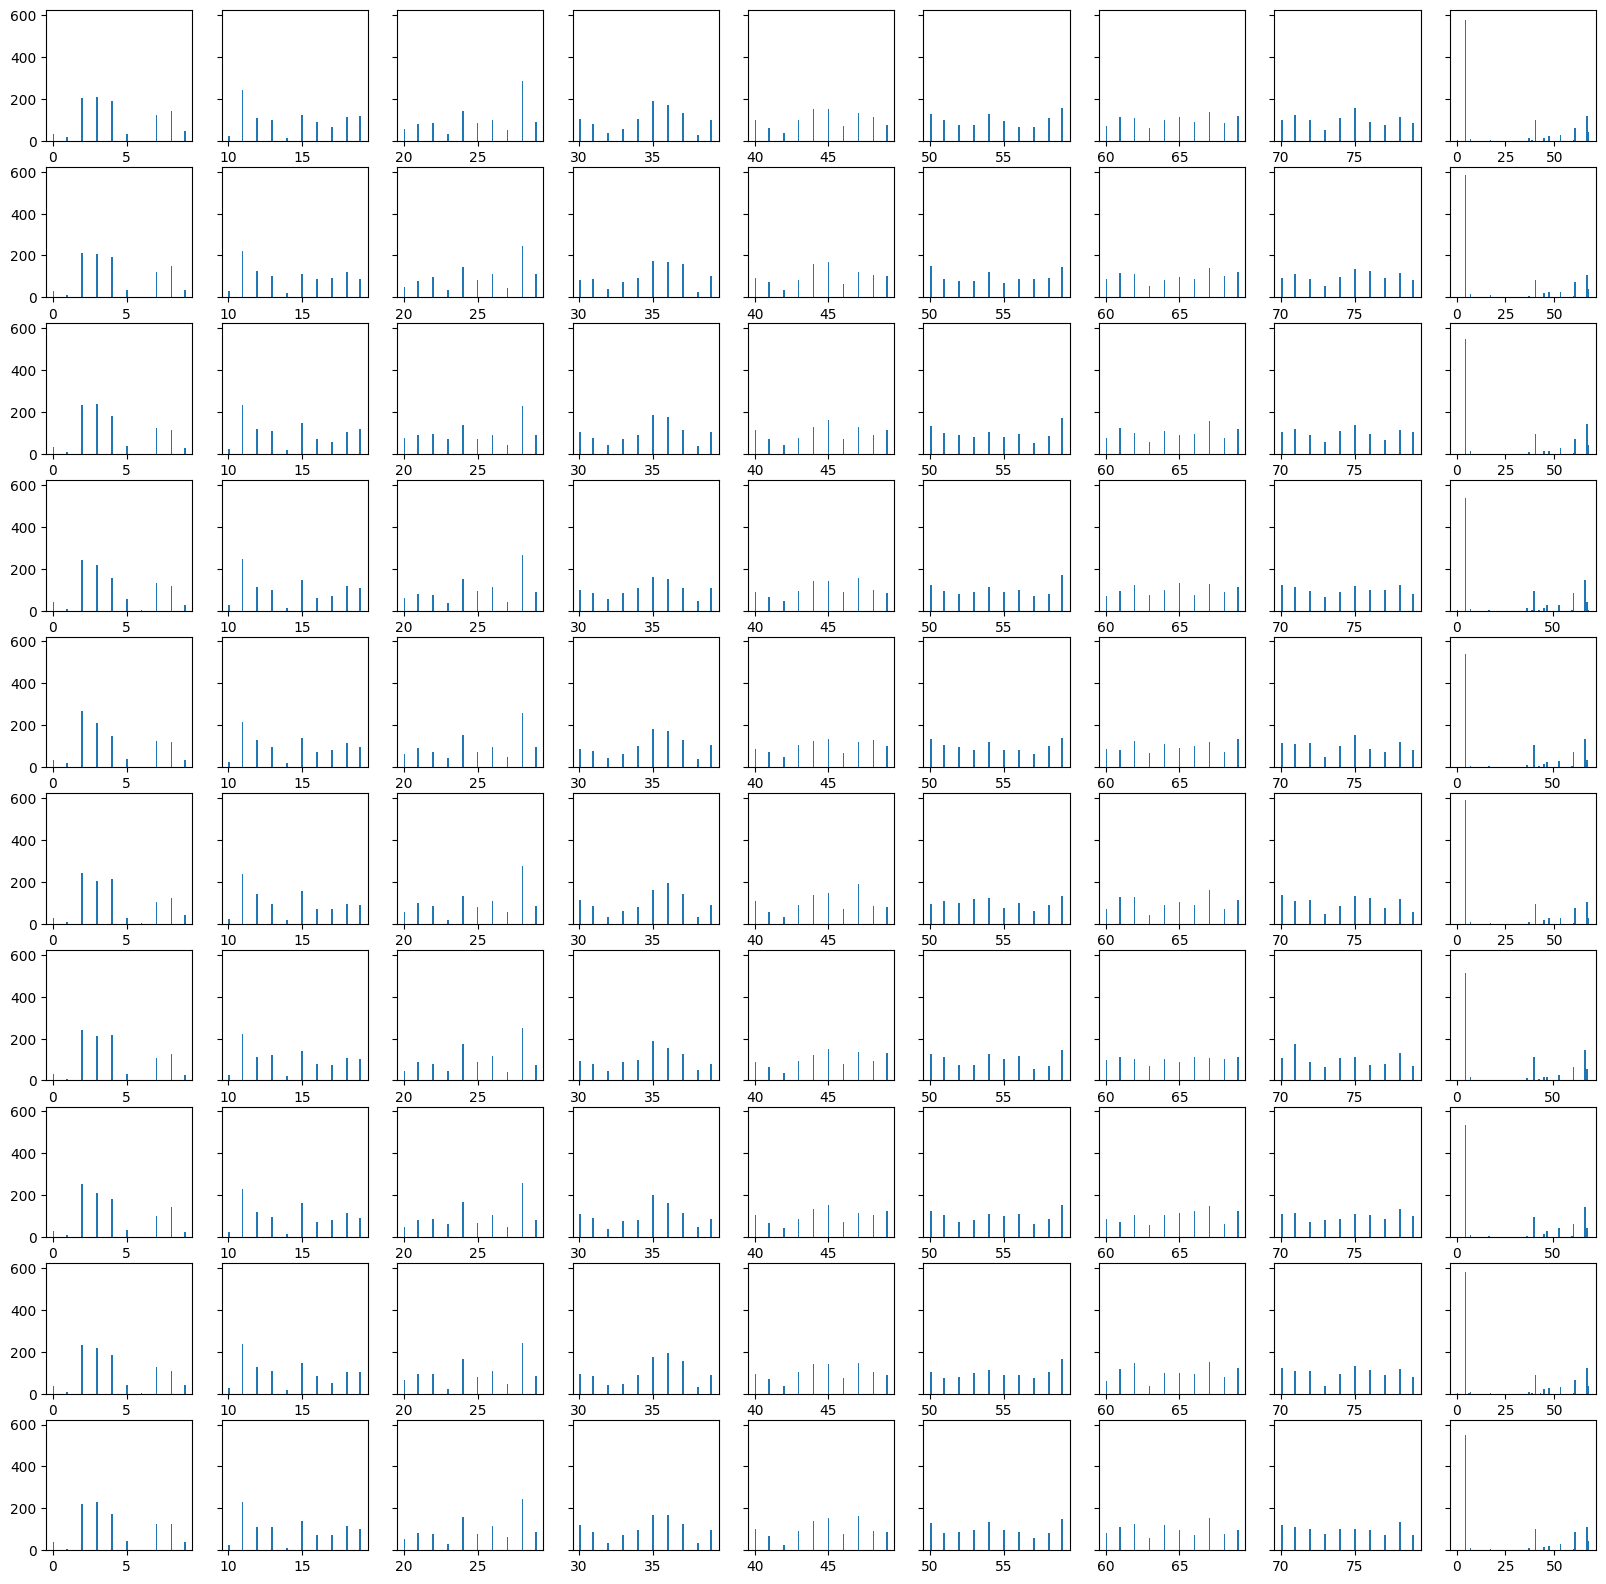

In [39]:
#distribuion of predictions cols = tasks, rows = contexs

_, axs = plt.subplots(10, 9, figsize=(20,20), sharey=True)
for i in range(10):
    for j in range(9):
        axs[i, j].hist(preds[:,j].min(2).indices[i], bins=80)

In [ ]:
"""    
    [100]*8,
    [200]*8,
    [300]*8,
    range(100, 900, 100),
    range(100, 500, 50),
    range(450, 50, -50),
    range(800, 0, -100),
    [400]*8,
    [500]*8,
    [600]*8,
"""

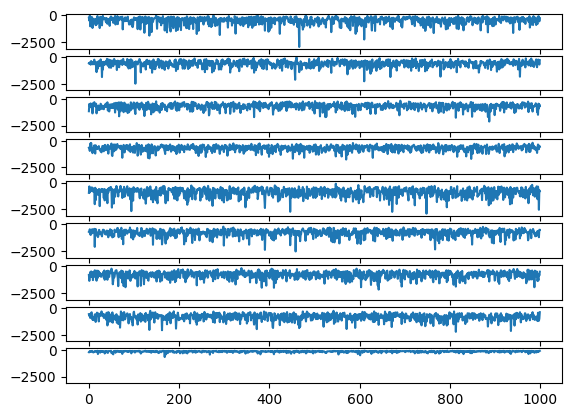

In [10]:
fig, axs = plt.subplots(9, sharey=True)
for i in range(9):
    axs[i].plot(a[4][i])


In [ ]:
def hinge_loss(W, Y_true, Y_preds, X, margin=1.0):
    energies = [energy_function(W, Y, X) for Y in Y_preds]
    return torch.clamp(margin + torch.max(torch.stack(energies)) - energy_function(W, Y_true, X), min=0)

def log_loss(W, Y_true, Y_preds, X):
    energies = [energy_function(W, Y, X) for Y in Y_preds]
    return torch.log(1 + torch.exp(torch.max(torch.stack(energies)) - energy_function(W, Y_true, X)))

def lvq2_loss(W, Y_true, Y_preds, X, margin=1.0):
    energies = [energy_function(W, Y, X) for Y in Y_preds]
    return torch.min(torch.tensor([margin, torch.max(torch.tensor([0.0, max(energies) - energy_function(W, Y_true, X)]))]))

def mce_loss(W, Y_true, Y_preds, X):
    energies = [energy_function(W, Y, X) for Y in Y_preds]
    diff = torch.max(torch.stack(energies)) - energy_function(W, Y_true, X)
    return 1 / (1 + torch.exp(-diff))

def square_square_loss(W, Y_true, Y_preds, X, margin=1.0):
    energies = [energy_function(W, Y, X) for Y in Y_preds]
    diff = torch.max(torch.stack(energies)) - energy_function(W, Y_true, X)
    return torch.pow(torch.max(torch.tensor([0.0, margin - diff])), 2)

def mee_loss(W, Y_true, Y_preds, X, beta=1.0):
    numerator = torch.exp(-beta * energy_function(W, Y_true, X))
    denominator = sum([torch.exp(-beta * energy_function(W, Y, X)) for Y in Y_preds])
    return 1 - numerator / denominator


In [53]:
discount = torch.ones_like(a[0])
for i in range(9):
    discount[i] += i*100

In [59]:
for i in range(9):
    print(((a[4]+discount).min(0).indices == i).sum())

tensor(341)
tensor(262)
tensor(117)
tensor(70)
tensor(126)
tensor(44)
tensor(25)
tensor(15)
tensor(0)


Files already downloaded and verified
Files already downloaded and verified


100%|██████████| 10/10 [00:08<00:00,  1.20it/s]


[tensor([[ -332.1984,  -882.0370,  -825.0294,  ...,  -581.6948,  -811.5552,
           -320.9722],
         [ -653.0163, -1265.4698,  -712.0722,  ...,  -537.0739,  -381.5840,
           -713.0222],
         [ -513.6185,  -247.1594,  -308.1905,  ...,  -604.1494,  -483.2126,
           -503.8494],
         ...,
         [ -295.6271,  -508.4421,  -423.1212,  ...,  -472.3504,  -777.8860,
           -365.8806],
         [ -372.7446,  -719.7759,  -636.2001,  ...,  -541.8967,  -458.6143,
           -597.4738],
         [ -110.2501,  -188.9386,   -94.0822,  ...,  -110.9981,   -93.3193,
           -139.0196]]),
 tensor([[  -99.2458,  -704.7709, -1108.4977,  ...,  -963.6246,  -577.3654,
           -849.4291],
         [ -514.6848,  -391.1851,  -321.7609,  ...,  -699.5035,  -401.6432,
           -563.5027],
         [ -578.8660,  -430.9225,  -481.4073,  ...,  -884.0098,  -153.6014,
          -1019.7121],
         ...,
         [ -655.7499,  -594.2655,  -192.8170,  ..., -1042.9359,  -821.6274,
   

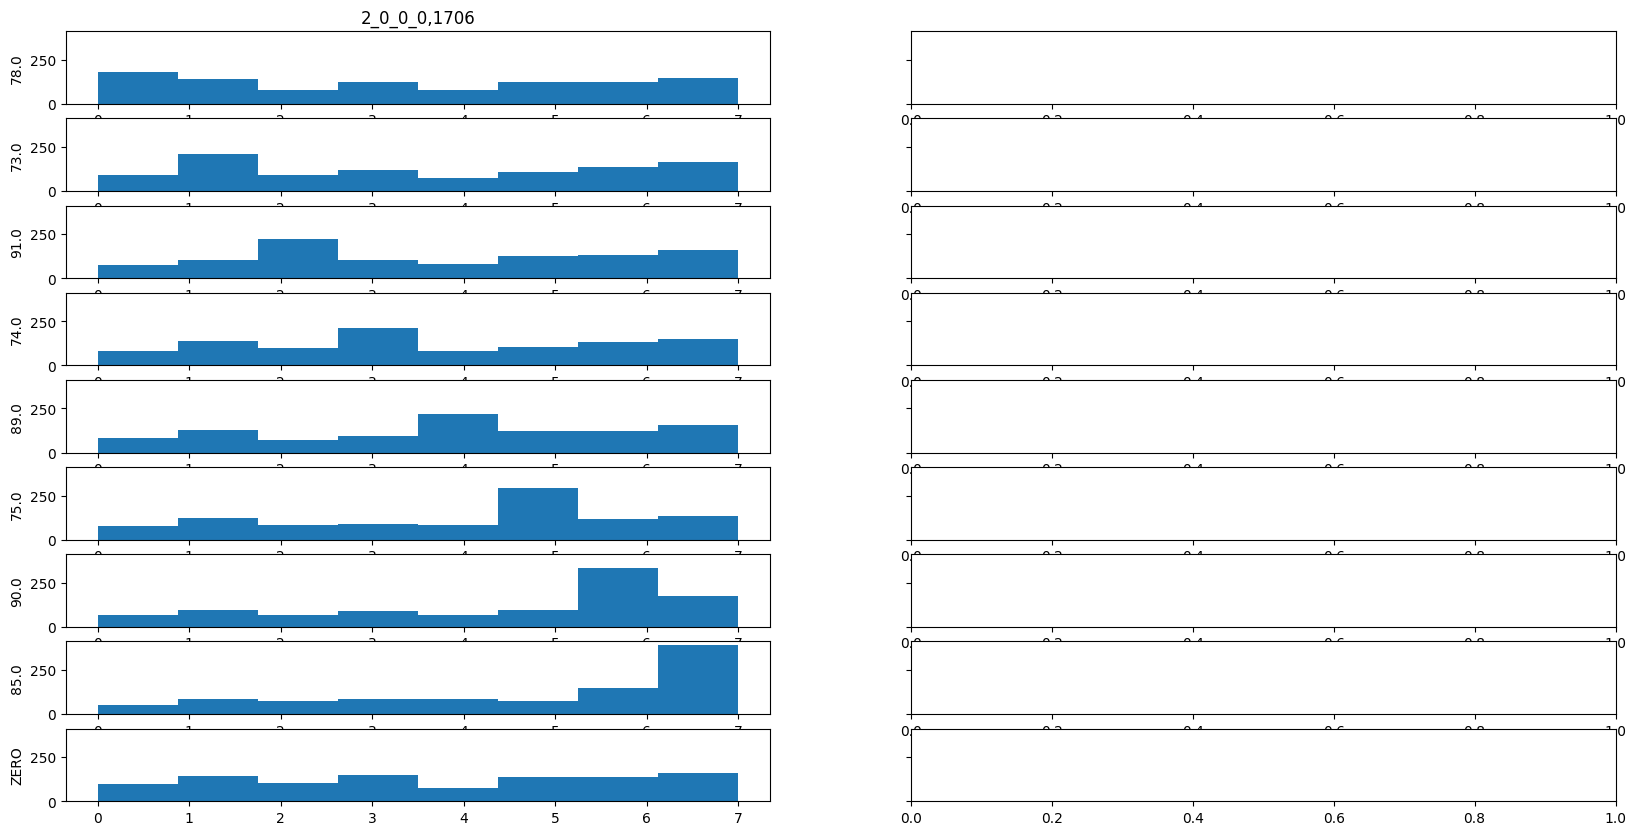

In [63]:
plot_hists(["2_0_0_0", "2_4_0_0"])

In [64]:
plot_hists(["ce_0_0", "ce_0_0"])

Files already downloaded and verified
Files already downloaded and verified


100%|██████████| 10/10 [00:08<00:00,  1.20it/s]


In [ ]:
    [100]*8,
    [200]*8,
    [300]*8,
    range(100, 900, 100),
    range(100, 500, 50),
    range(450, 50, -50),
    range(800, 0, -100),
    [400]*8,
    [500]*8,
    [600]*8,


In [ ]:
# Fuzzy 0,1
# hinge loss 3
# margin: 100, 200, 300, 100-300, 300-100

In [34]:
import torch
import pickle
import models_jw
from utils import *
from tqdm import tqdm
import numpy as np
from configs import paramsuper, getters

args = paramsuper.ICIFARHashResNet18()

torch.manual_seed(args.seed)
np.random.seed(0)

use_cuda = not args.no_cuda and torch.cuda.is_available()
device = torch.device("cuda:3" if use_cuda else "cpu")
kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}


margins = [
    [100]*8,
    [200]*8,
    [300]*8,
    range(100, 900, 100),
    range(100, 500, 50),
    range(450, 50, -50),
    range(800, 0, -100)
]
args.period=3
for fuzzy in [1,0]:
    for hingeLoss in range(1,3):
        for idxs, margin in enumerate(margins):
            torch.manual_seed(args.seed)
            np.random.seed(0)
            TASKS_NUM = 8
            net = models_jw.HashResNet18(10).to(device)
            train_loader = getters.get_dataset(args.dataset, args.period, args.batch_size, True, kwargs)
            test_loader = getters.get_dataset(args.dataset, 1, args.test_batch_size, False, kwargs)
            optimizer = torch.optim.RMSprop(net.parameters(), lr=0.01)
            diffs = []
            for time in tqdm(range(TASKS_NUM*args.period)):
                task_idx = time // args.period
                X, y = train_loader.get_data()
                X, y = X.to(device), y.to(device)        
                z = prepare_z(task_idx, device, fuzzy)
                y_hat, _, _ = net(X, z)
                optimizer.zero_grad()
                loss = hinge_loss(y_hat, y, margin[task_idx], type=hingeLoss)
                loss.backward()
                optimizer.step()
                diffs.append(torch.mean(y_hat.max(1).values - y_hat.min(1).values).item())

            with open(f"ebms/{hingeLoss}_{idxs}_{fuzzy}_0", "wb") as fp:   
                pickle.dump(diffs, fp)
            torch.save(net.state_dict(), f"ebms/{hingeLoss}_{idxs}_{fuzzy}_0.pth")


            # tasks_num = 10
            # accs =  {i: 0 for i in range(tasks_num)}
            # for time in tqdm(range(tasks_num)):
            #     X, y = test_loader.get_data()
            #     X, y = X.to(device), y.to(device)        
            #     z = torch.zeros(10, device=device)
            #     z[time] = 1
                
            #     y_hat, _, _ = net(X, z)
            #     accs[time] = accs[time] + (y_hat.min(1).indices==y).sum().item()
            # print(accs)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


100%|██████████| 24/24 [00:01<00:00, 20.89it/s]


Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


100%|██████████| 24/24 [00:01<00:00, 20.96it/s]


Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


100%|██████████| 24/24 [00:01<00:00, 20.97it/s]


Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


  8%|▊         | 2/24 [00:00<00:02, 10.87it/s]


KeyboardInterrupt: 

AttributeError: 'ICIFARHashResNet18' object has no attribute 'keys'

In [9]:
net.state_dict()['linear.o']

tensor([[ 1.,  1.,  1.,  ..., -1., -1.,  1.],
        [ 1., -1.,  1.,  ..., -1., -1.,  1.],
        [ 1.,  1., -1.,  ..., -1.,  1., -1.],
        ...,
        [-1., -1.,  1.,  ...,  1., -1., -1.],
        [ 1.,  1.,  1.,  ...,  1.,  1.,  1.],
        [ 1., -1., -1.,  ..., -1., -1.,  1.]], device='cuda:3')